# Levelable - Data Analysis

A file to do some basic data wrangling on the data generated by `levelable_main.ipynb`.

### Setup

In [1]:
# Load some relevant packages
import pandas as pd
import numpy as np

from sage.graphs.independent_sets import IndependentSets
from sage.graphs.graph_input import from_graph6
from sage.graphs.trees import TreeIterator

# Load some convenience functions
load("lvb_funs.py")

# Compile results into a single data frame
results = pd.DataFrame()

for n in range(5, 11):
    if n < 9:
        results = results.append(pd.read_csv("results/resultsconnected" + str(n) + ".csv"), ignore_index = True)
    
    else:
        for i in range(1, n+1):
            results = results.append(pd.read_csv("results/resultsconnected" + str(n) + "_" + str(i) + "of" + str(n) + ".csv"), ignore_index = True)

### To do

* show that it is enough to show for connected compments of a graph
* If it contains a P(5) + another condition is it definitely not levelable? What is this other condition? because it seems like most graphs who 
* Borrow: "Monomial Ideals"
* Grobner bases in Commutative Algebra by Ene and Herzog

* Look for patterns in graphs that contain $P(5)$
* Look for an obstruction on 7 vertices (search for these on 8 vertices 
* If we take any 4 vertices in FHQ}o or FBnvO do we make a cycle to rule out $P(5)$?
* 

### Notes
* counter example to induced subgraph (minimum obstruction): ECZG we can find induced P(5), and it is levelable

## Are cycles levelable?

In [28]:
#cyclesData = pd.DataFrame()

for n in range(25, 35):
    g  = graphs.CycleGraph(n).canonical_label()
    cyclesData = cyclesData.append({"cycle": n,
                                    "graph6string": g.graph6_string(),
                                    "levelable": is_levelable(g)}, ignore_index = True)

KeyboardInterrupt: 

In [30]:
cyclesData

cycle                                       graph6string  levelable
0     5.0                                                DLo        1.0
1     6.0                                               EIe_        0.0
2     7.0                                              FHQSO        1.0
3     8.0                                             GICcSG        0.0
4     9.0                                            HHOOSIA        0.0
5    10.0                                          IIC_OIA_O        0.0
6    11.0                                        JHOOOGA_S@?        0.0
7    12.0                                       KIC_OGA?S@OA        0.0
8    13.0                                     LHOOOGA?O@OA_A        0.0
9    14.0                                  MIC_OGA?O@?A_A_@?        0.0
10   15.0                                NHOOOGA?O@?A?A_@O?O        0.0
11   16.0                              OIC_OGA?O@?A?A?@O?S?A        0.0
12   17.0                           PHOOOGA?O@?A?A?@??S?A_?G        0.0
13   18.0                        QIC_OGA?O@?A?A?@??O?A_?I??O        0.0
14   19.0                     RHOOOGA?O@?A?A?@??O?A??I??S??O        0.0
15   20.0                  SIC_OGA?O@?A?A?@??O?A??G??S??S??G        0.0
16   21.0               THOOOGA?O@?A?A?@??O?A??G??O??S??I??A        0.0
17   22.0           UIC_OGA?O@?A?A?@??O?A??G??O??O??I??A_??O        0.0
18   23.0       VHOOOGA?O@?A?A?@??O?A??G??O??O??G??A_??S??@?        0.0
19   24.0    WIC_OGA?O@?A?A?@??O?A??G??O??O??G??A???S??@O??A        0.0
20   25.0  XHOOOGA?O@?A?A?@??O?A??G??O??O??G??A???O??@O??...        0.0
21   26.0  YIC_OGA?O@?A?A?@??O?A??G??O??O??G??A???O??@???...        0.0
22   27.0  ZHOOOGA?O@?A?A?@??O?A??G??O??O??G??A???O??@???...        0.0
23   28.0  [IC_OGA?O@?A?A?@??O?A??G??O??O??G??A???O??@???...        0.0
24   29.0  \HOOOGA?O@?A?A?@??O?A??G??O??O??G??A???O??@???...        0.0

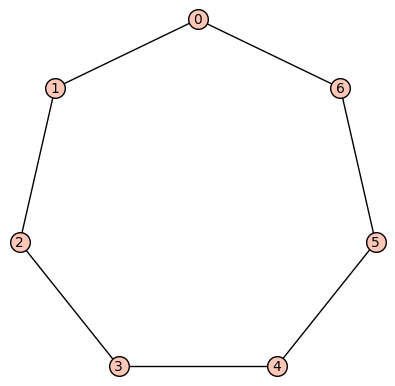

FhCKG
Independent Sets
[[0, 2, 4], [0, 2, 5], [0, 3, 5], [1, 3, 5], [1, 3, 6], [1, 4, 6], [2, 4, 6]]

Matrix A
[[ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


True

In [31]:
is_levelable(graphs.CycleGraph(7), verbose = True)

**Conjecture** 
No cycle graph on more than 7 vertices is levelable.

(Well, this might be obvious since all these cycles will contain $P(5)$.)

## Minimal obstructions of 7 vertices

There are two graphs on 7 vertices which are not levelable and don't contain an induced P(5):
1. `FHQ}o` and 
2. `FBnvO`

Here I'm searching through graphs on 8 vertices, and checking whether they include these graphs as subgraphs.

In [5]:
### Check for  FHQ}o ####

# Grab all graphs on 8 vertices
df = results.query('graph6string.str.contains("^H")')

# Get obstruction graph object
searchFor = g_read("FHQ}o")
                   
# Empty data frame to hold results
contains_ob = pd.DataFrame()

# Iterrate through the graphs on 8 vertices
for index, row in df.iterrows():
    
    # Return true if it inclues the subgraph
    val = g_read(row["graph6string"]).subgraph_search(searchFor, induced = True) != None
    
    # Record result
    contains_ob = contains_ob.append({"graph6string": row["graph6string"],
                                   "contains_FHQ}o": val}, ignore_index = True)
    
# Merge with the original dataframe, which includes levelable data
df = pd.merge(df, contains_ob)

In [7]:
## Save a copy of results in case
# df.to_csv("obs7.csv")

In [11]:
# Get obstruction graph object
searchFor2 = g_read("FBnvO")

#Empty data frame to hold results
contains_ob2 = pd.DataFrame()

# Iterate through the graphs on 8 vertices
for index, row in df.iterrows():
    # Set true if it includes the subgraph
    val = g_read(row["graph6string"]).subgraph_search(searchFor2, induced = True) != None
    
    # Append result
    contains_ob2 = contains_ob2.append({"graph6string": row["graph6string"],
                                   "contains_FBnvO": val}, ignore_index = True)

# Merge with data frame which includes levelable data and the data for 
df = pd.merge(df, contains_ob2)

In [14]:
df.to_csv("obs7.csv")

In [64]:
df8 = pd.read_csv("obs7.csv")

df8.query('levelable == "T" & contains_FBnvO')

Unnamed: 0 graph6string levelable  \
10987        10987      H?YRzix         T   
11130        11130      H?YRlv{         T   
11188        11188      H?NBk~{         T   
11232        11232      HIAH~zy         T   
11986        11986      H?U`~ru         T   
12104        12104      H?S|Nvu         T   
15948        15948      HLre`[^         T   
15956        15956      HLHXu^M         T   
15958        15958      HBDk~Vk         T   
15972        15972      H@D^^Zw         T   
15980        15980      HkSxuMn         T   
16007        16007      HGvV`}|         T   
16008        16008      HBQ|vrm         T   
16012        16012      HHt]dmn         T   
16027        16027      HUC~U\n         T   
16029        16029      HGs}lnx         T   
16030        16030      HO]ZrnV         T   
16043        16043      HLVM`}n         T   
16046        16046      HAnNbyv         T   
16049        16049      HLoyt^V         T   
16050        16050      HMSu\]n         T   
16051        16051      HBY{r^r         T   
16052        16052      HMpXt]v         T   
16053        16053      HBevR^|         T   
16054        16054      HRWmk~^         T   
16055        16055      HBlknNz         T   
16056        16056      HBmR^L~         T   
16057        16057      HBJ^Uu~         T   
16058        16058      HAY|vd~         T   
16059        16059      HdS^L\~         T   
...            ...          ...       ...   
260094      260094      HAnnf_~         T   
260351      260351      HNL\\^N         T   
260383      260383      HI{|mnf         T   
260440      260440      HNLZ\^N         T   
260442      260442      HHV~fU^         T   
260443      260443      HNL\]^n         T   
260444      260444      HLS}~Zn         T   
260445      260445      HHU}~q~         T   
260446      260446      HBZ^^q~         T   
260447      260447      HHU}~p~         T   
260448      260448      HHU}~r~         T   
260468      260468      HLsy~Nf         T   
260553      260553      HGn\mpr         T   
260580      260580      HI~ch~r         T   
260612      260612      HHV~fQZ         T   
260613      260613      HI}u`~f         T   
260616      260616      HjemnO~         T   
260617      260617      HFz@zmn         T   
260618      260618      HBz`|nZ         T   
260619      260619      HlU`z]^         T   
260621      260621      HlU`x~N         T   
260622      260622      HImp}vf         T   
260623      260623      Hydl`~^         T   
260624      260624      HFrb\t~         T   
260625      260625      HBzdul~         T   
260626      260626      H]NB[~~         T   
260666      260666      HHnU\l^         T   
260784      260784      H]oyz]v         T   
260834      260834      HLzP~fN         T   
260924      260924      HML\\~m         T   

                                   minimized solution  contains_FHQ}o  \
10987   [2.0, 2.0, 3.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0]             0.0   
11130   [2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 4.0]             1.0   
11188   [2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0]             0.0   
11232   [2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 3.0, 4.0, 3.0]             0.0   
11986   [2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0]             1.0   
12104   [2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0]             1.0   
15948   [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]             1.0   
15956   [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]             1.0   
15958   [2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0]             1.0   
15972   [2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0]             1.0   
15980   [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]             1.0   
16007   [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]             0.0   
16008   [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]             0.0   
16012   [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]             1.0   
16027   [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0]             1.0   
16029   [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 

## $P(5)$ as an obstruction
### $P(5)$ in 6 vertices:

In [54]:
df = results.query('graph6string.str.contains("^E")')
p5 = graphs.PathGraph(5)

containsp5 = pd.DataFrame()

for index, row in df.iterrows():
    
    val = g_read(row["graph6string"]).subgraph_search(p5, induced = True) != None
    
    containsp5 = containsp5.append({"graph6string": row["graph6string"],
                                   "containsP5": val}, ignore_index = True)
    
df = pd.merge(df, containsp5)

### Graphs on 6 vertices that are levelable *and* contain $P(5)$

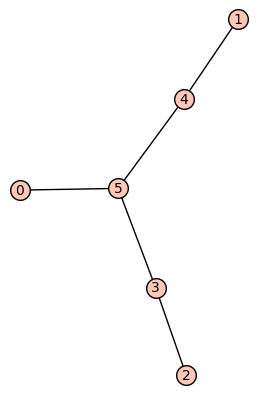

E@QW
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 4], [0, 3, 4], [1, 2, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.]
 [ 0.  0.  1. -1.  0.  0.]
 [ 1. -1. -1.  1.  1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


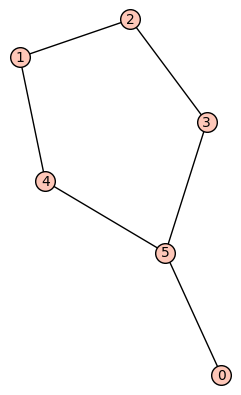

EHQW
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 3, 4], [1, 5], [2, 5]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.]
 [ 0.  0.  1. -1.  0.  0.]
 [ 1. -1.  0.  1.  1. -1.]
 [ 0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


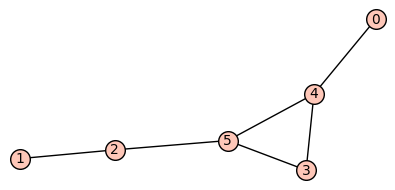

EGcw
Independent Sets
[[0, 1, 3], [0, 1, 5], [0, 2, 3], [1, 4], [2, 4]]

Matrix A
[[ 0.  0.  0.  1.  0. -1.]
 [ 0.  1. -1. -1.  0.  1.]
 [ 1. -1.  1.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


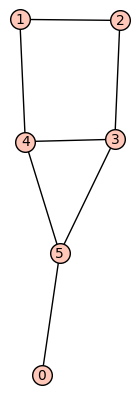

EHUW
Independent Sets
[[0, 1, 3], [0, 2, 4], [1, 5], [2, 5]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.]
 [ 1. -1.  1.  0.  1. -1.]
 [ 0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


In [52]:
for index, row in df.query('levelable == "T" & containsP5').iterrows():
    is_levelable(row["graph6string"], verbose = True)

### Graphs on 6 vertices that aren't levelable and don't contain $P(5)$ (there are none)

In [59]:
df.query('levelable == "F" & containsP5 == 0').shape[0]

0

### $P(5)$ in 7 vertices:

In [34]:
df7 = results.query('graph6string.str.contains("^F")')
p5 = graphs.PathGraph(5)

containsp5 = pd.DataFrame()

for index, row in df.iterrows():
    val = g_read(row["graph6string"]).subgraph_search(p5, induced = True) != None
    containsp5 = containsp5.append({"graph6string": row["graph6string"],
                                   "containsP5": val}, ignore_index = True)
    
df7 = pd.merge(df, containsp5)

#### Graphs on 7 vertices that are levelable and contain $P(5)$

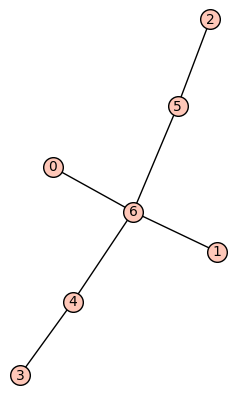

F?CeW
Independent Sets
[[0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 5], [0, 1, 4, 5], [2, 3, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  1. -1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 1.  1. -1. -1.  1.  1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


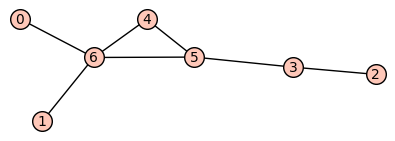

F@?]W
Independent Sets
[[0, 1, 2, 4], [0, 1, 2, 5], [0, 1, 3, 4], [2, 6], [3, 6]]

Matrix A
[[ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  1. -1. -1.  1.  0.]
 [ 1.  1. -1.  1.  1.  0. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 2.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0]


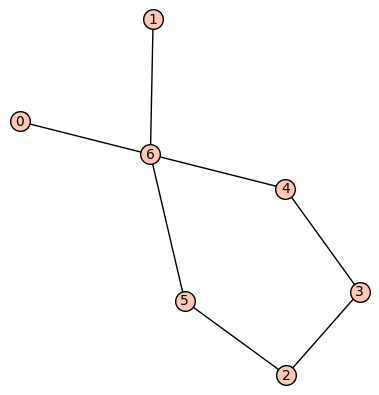

F@CeW
Independent Sets
[[0, 1, 2, 4], [0, 1, 3, 5], [0, 1, 4, 5], [2, 6], [3, 6]]

Matrix A
[[ 0.  0.  1. -1.  1. -1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 1.  1. -1.  0.  1.  1. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 2.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0]


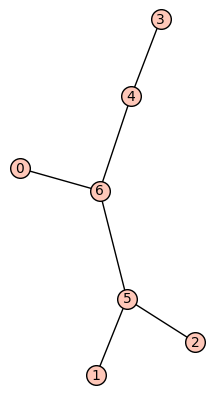

F?DcW
Independent Sets
[[0, 1, 2, 3], [0, 1, 2, 4], [0, 3, 5], [0, 4, 5], [1, 2, 3, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  1. -1.  1. -1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 1. -1. -1. -1.  1.  1. -1.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [-1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


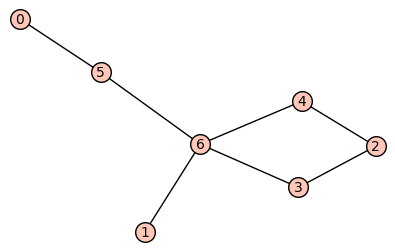

F@IAw
Independent Sets
[[0, 1, 2], [0, 1, 3, 4], [0, 2, 6], [1, 2, 5], [1, 3, 4, 5]]

Matrix A
[[ 0.  0.  1. -1. -1.  0.  0.]
 [ 0.  1. -1.  1.  1.  0. -1.]
 [ 1. -1.  0.  0.  0. -1.  1.]
 [ 0.  0.  1. -1. -1.  0.  0.]]

B
[[-1.]
 [ 1.]
 [ 0.]
 [-1.]]

Solution
[2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0]


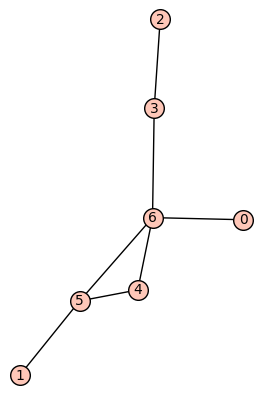

F@@Kw
Independent Sets
[[0, 1, 2, 4], [0, 1, 3, 4], [0, 2, 5], [0, 3, 5], [1, 2, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1.  1. -1.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1. -1.  1.  0.  1. -1.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


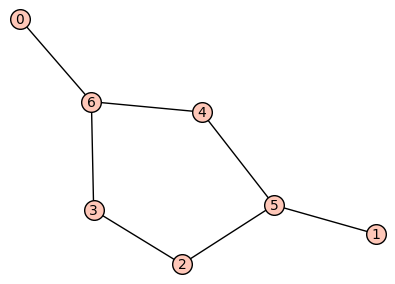

F@@ko
Independent Sets
[[0, 1, 2, 4], [0, 1, 3, 4], [0, 3, 5], [1, 2, 6], [5, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -1.  0.]
 [ 1. -1. -1.  1.  0.  1. -1.]
 [ 0.  1.  1.  0.  0. -1.  0.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


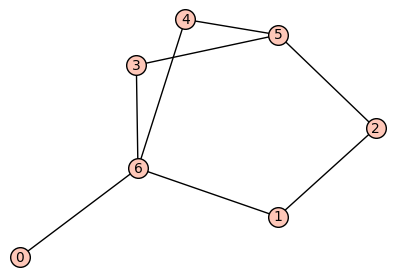

FG?}o
Independent Sets
[[0, 1, 3, 4], [0, 1, 5], [0, 2, 3, 4], [2, 6], [5, 6]]

Matrix A
[[ 0.  0.  0.  1.  1. -1.  0.]
 [ 0.  1. -1. -1. -1.  1.  0.]
 [ 1.  0.  0.  1.  1.  0. -1.]
 [ 0.  0.  1.  0.  0. -1.  0.]]

B
[[ 1.]
 [-1.]
 [ 2.]
 [ 0.]]

Solution
[2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 4.0]


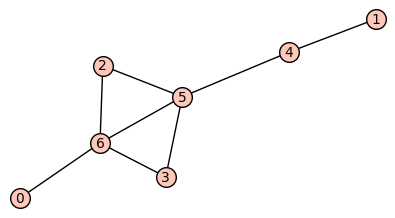

F?O|g
Independent Sets
[[0, 1, 2, 3], [0, 1, 5], [0, 2, 3, 4], [1, 6], [4, 6]]

Matrix A
[[ 0.  0.  1.  1.  0. -1.  0.]
 [ 0.  1. -1. -1. -1.  1.  0.]
 [ 1. -1.  1.  1.  1.  0. -1.]
 [ 0.  1.  0.  0. -1.  0.  0.]]

B
[[ 1.]
 [-1.]
 [ 2.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0]


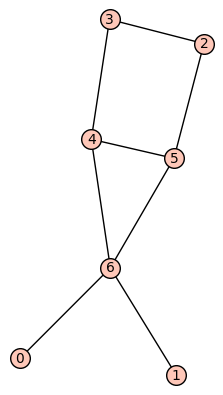

F@CmW
Independent Sets
[[0, 1, 2, 4], [0, 1, 3, 5], [2, 6], [3, 6]]

Matrix A
[[ 0.  0.  1. -1.  1. -1.  0.]
 [ 1.  1. -1.  1.  0.  1. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 2.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0]


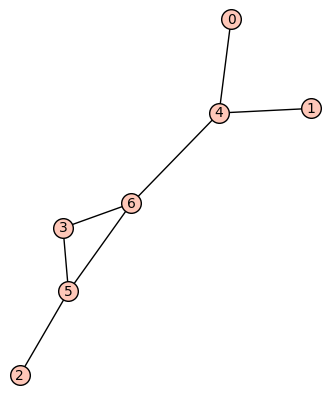

F?oow
Independent Sets
[[0, 1, 2, 3], [0, 1, 2, 6], [0, 1, 5], [2, 3, 4], [4, 5]]

Matrix A
[[ 0.  0.  0.  1.  0.  0. -1.]
 [ 0.  0.  1.  0.  0. -1.  1.]
 [ 1.  1. -1. -1. -1.  1.  0.]
 [ 0.  0.  1.  1.  0. -1.  0.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0]


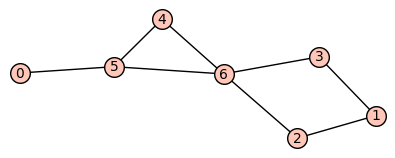

FIAHw
Independent Sets
[[0, 1, 4], [0, 1, 6], [0, 2, 3, 4], [1, 5], [2, 3, 5]]

Matrix A
[[ 0.  0.  0.  0.  1.  0. -1.]
 [ 0.  1. -1. -1. -1.  0.  1.]
 [ 1. -1.  1.  1.  1. -1.  0.]
 [ 0.  1. -1. -1.  0.  0.  0.]]

B
[[ 0.]
 [-1.]
 [ 2.]
 [-1.]]

Solution
[2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0]


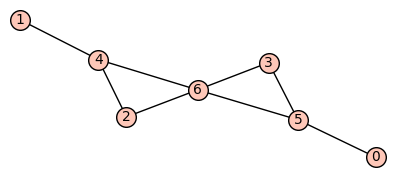

F?YPw
Independent Sets
[[0, 1, 2, 3], [0, 1, 6], [0, 3, 4], [1, 2, 5], [4, 5]]

Matrix A
[[ 0.  0.  1.  1.  0.  0. -1.]
 [ 0.  1.  0. -1. -1.  0.  1.]
 [ 1. -1. -1.  1.  1. -1.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]]

B
[[ 1.]
 [ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]


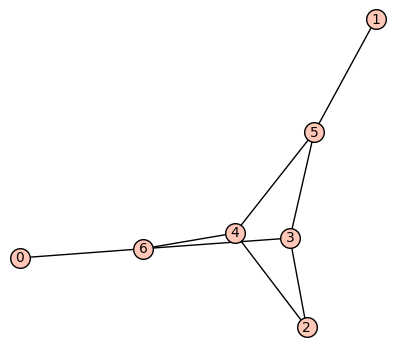

F@H[o
Independent Sets
[[0, 1, 2], [0, 1, 3, 4], [0, 2, 5], [1, 2, 6], [2, 5, 6]]

Matrix A
[[ 0.  0.  1. -1. -1.  0.  0.]
 [ 0.  1. -1.  1.  1. -1.  0.]
 [ 1. -1.  0.  0.  0.  1. -1.]
 [ 0.  1.  0.  0.  0. -1.  0.]]

B
[[-1.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0]


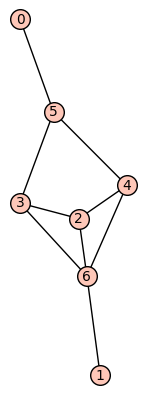

F@IZo
Independent Sets
[[0, 1, 2], [0, 1, 3, 4], [0, 6], [1, 2, 5], [5, 6]]

Matrix A
[[ 0.  0.  1. -1. -1.  0.  0.]
 [ 0.  1.  0.  1.  1.  0. -1.]
 [ 1. -1. -1.  0.  0. -1.  1.]
 [ 0.  1.  1.  0.  0.  0. -1.]]

B
[[-1.]
 [ 2.]
 [-1.]
 [ 1.]]

Solution
[2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 4.0]


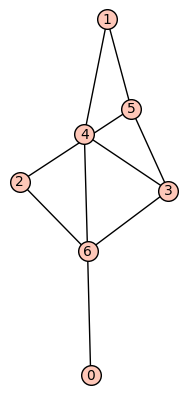

F?Tto
Independent Sets
[[0, 1, 2, 3], [0, 2, 4], [0, 4, 5], [1, 6], [5, 6]]

Matrix A
[[ 0.  1.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 1. -1.  0.  0.  1.  1. -1.]
 [ 0.  1.  0.  0.  0. -1.  0.]]

B
[[ 1.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0]


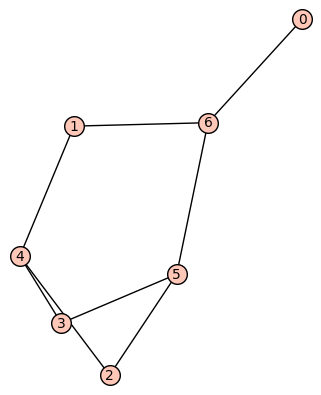

F?[uG
Independent Sets
[[0, 1, 2, 3], [0, 1, 5], [0, 4, 5], [2, 3, 6], [4, 6]]

Matrix A
[[ 0.  0.  1.  1.  0. -1.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.]
 [ 1.  0. -1. -1.  1.  1. -1.]
 [ 0.  0.  1.  1. -1.  0.  0.]]

B
[[ 1.]
 [ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.0]


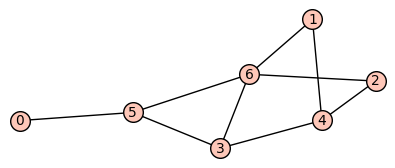

F?]Rg
Independent Sets
[[0, 1, 2, 3], [0, 4, 6], [1, 2, 5], [4, 5]]

Matrix A
[[ 0.  1.  1.  1. -1.  0. -1.]
 [ 1. -1. -1.  0.  1. -1.  1.]
 [ 0.  1.  1.  0. -1.  0.  0.]]

B
[[ 1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0]


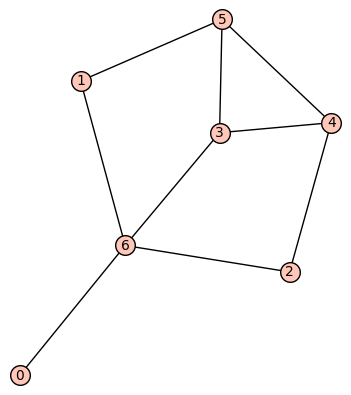

F?L^_
Independent Sets
[[0, 1, 2, 3], [0, 1, 4], [0, 2, 5], [4, 6], [5, 6]]

Matrix A
[[ 0.  0.  1.  1. -1.  0.  0.]
 [ 0.  1. -1.  0.  1. -1.  0.]
 [ 1.  0.  1.  0. -1.  1. -1.]
 [ 0.  0.  0.  0.  1. -1.  0.]]

B
[[ 1.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]


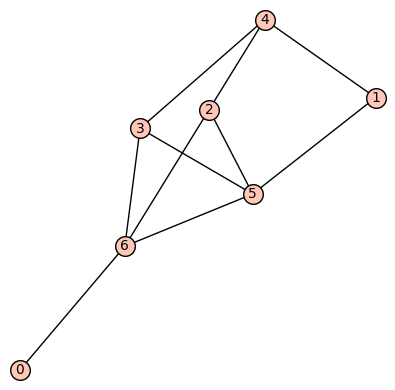

F?\tg
Independent Sets
[[0, 1, 2, 3], [0, 4, 5], [1, 6], [4, 6]]

Matrix A
[[ 0.  1.  1.  1. -1. -1.  0.]
 [ 1. -1.  0.  0.  1.  1. -1.]
 [ 0.  1.  0.  0. -1.  0.  0.]]

B
[[ 1.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0]


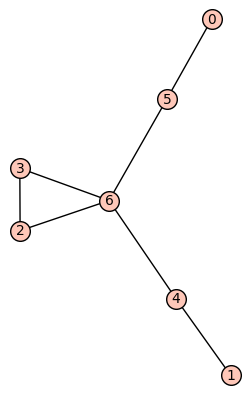

F@Q@w
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 1, 6], [0, 2, 4], [0, 3, 4], [1, 2, 5], [1, 3, 5], [2, 4, 5], [3, 4, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.]
 [ 0.  1. -1.  0. -1.  0.  1.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1. -1.  1.  1. -1.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


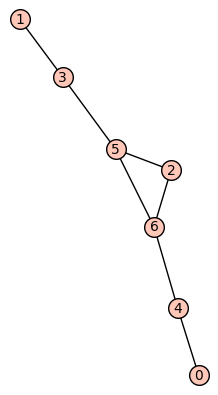

FA_pW
Independent Sets
[[0, 1, 2], [0, 1, 5], [0, 1, 6], [0, 2, 3], [0, 3, 6], [1, 2, 4], [1, 4, 5], [2, 3, 4]]

Matrix A
[[ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 0.  1. -1. -1.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0. -1.]
 [ 1. -1. -1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


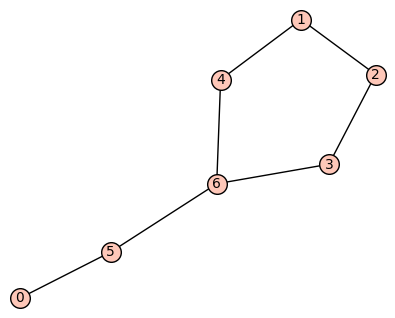

FHQ?w
Independent Sets
[[0, 1, 3], [0, 1, 6], [0, 2, 4], [0, 2, 6], [0, 3, 4], [1, 3, 5], [2, 4, 5], [3, 4, 5]]

Matrix A
[[ 0.  0.  0.  1.  0.  0. -1.]
 [ 0.  1. -1.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  1.  0. -1.]
 [ 0.  0.  1. -1. -1.  0.  1.]
 [ 1. -1.  0.  0.  1. -1.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


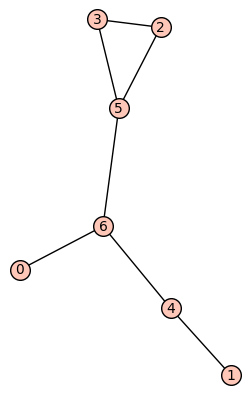

F@OsW
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 1, 5], [0, 2, 4], [0, 3, 4], [0, 4, 5], [1, 2, 6], [1, 3, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1.  0. -1.  1.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 1. -1. -1.  0.  1.  1. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


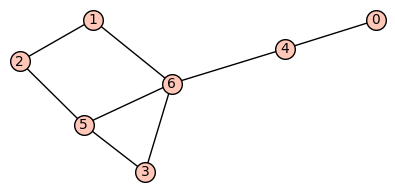

FG_qw
Independent Sets
[[0, 1, 3], [0, 1, 5], [0, 2, 3], [0, 2, 6], [1, 3, 4], [1, 4, 5], [2, 3, 4]]

Matrix A
[[ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.]
 [ 1. -1.  1. -1. -1.  0.  1.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


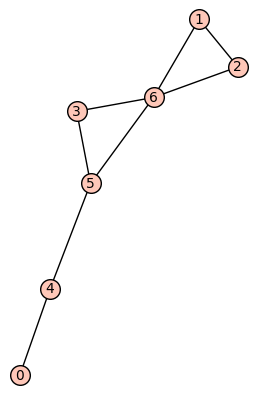

FG_Zg
Independent Sets
[[0, 1, 3], [0, 1, 5], [0, 2, 3], [0, 2, 5], [0, 6], [1, 3, 4], [2, 3, 4], [4, 6]]

Matrix A
[[ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  1. -1.]
 [ 1. -1.  0. -1. -1.  0.  1.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  0.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


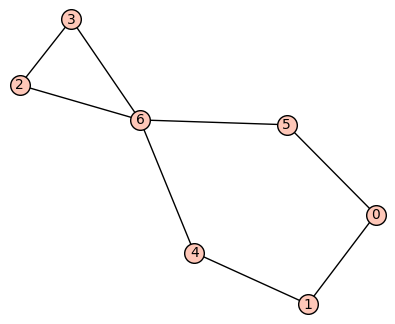

F`Q@w
Independent Sets
[[0, 2, 4], [0, 3, 4], [0, 6], [1, 2, 5], [1, 3, 5], [1, 6], [2, 4, 5], [3, 4, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0. -1.]
 [ 1. -1. -1.  0.  0. -1.  1.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1. -1.]
 [ 0.  1. -1.  0. -1. -1.  1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


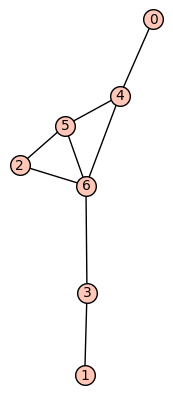

FA_hw
Independent Sets
[[0, 1, 2], [0, 1, 5], [0, 1, 6], [0, 2, 3], [0, 3, 5], [1, 2, 4], [2, 3, 4]]

Matrix A
[[ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 0.  1. -1. -1.  0.  0.  1.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 1. -1. -1.  1. -1.  1.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


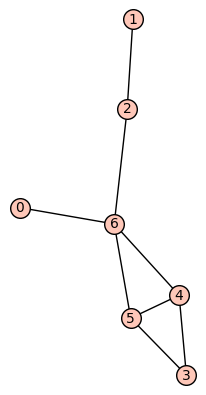

FGC\W
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 1, 5], [0, 2, 3], [0, 2, 4], [0, 2, 5], [1, 3, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]
 [ 1. -1.  1. -1.  0.  1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


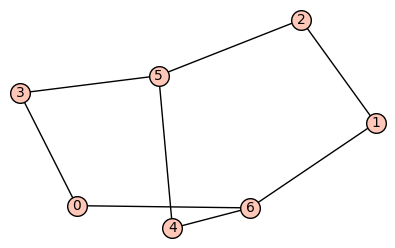

FK?}O
Independent Sets
[[0, 1, 4], [0, 1, 5], [0, 2, 4], [1, 3, 4], [2, 3, 4], [2, 3, 6], [5, 6]]

Matrix A
[[ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  1. -1.  0. -1.  1.  0.]
 [ 1. -1.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.]
 [ 0.  0.  1.  1.  0. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]


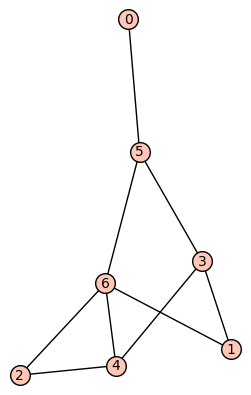

FAMRW
Independent Sets
[[0, 1, 2], [0, 1, 4], [0, 2, 3], [0, 3, 6], [1, 2, 5], [1, 4, 5]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1. -1. -1.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.]
 [ 1. -1. -1.  1.  0. -1.  1.]
 [ 0.  0.  1.  0. -1.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


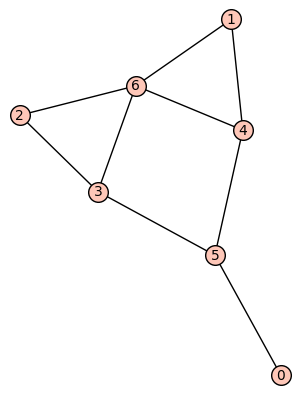

F@QZo
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 4], [0, 3, 4], [0, 6], [1, 2, 5], [5, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0. -1.]
 [ 1. -1. -1.  0.  0. -1.  1.]
 [ 0.  1.  1.  0.  0.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


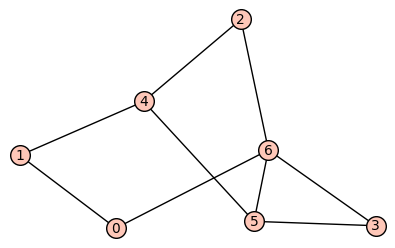

F_W\g
Independent Sets
[[0, 2, 3], [0, 2, 5], [0, 3, 4], [1, 2, 3], [1, 2, 5], [1, 6], [4, 6]]

Matrix A
[[ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  1. -1. -1.  1.  0.]
 [ 1. -1. -1.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  1. -1.]
 [ 0.  1.  0.  0. -1.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


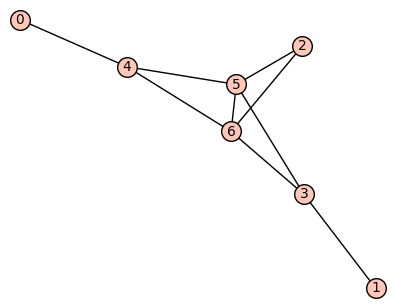

FA_xw
Independent Sets
[[0, 1, 2], [0, 1, 5], [0, 1, 6], [0, 2, 3], [1, 2, 4], [2, 3, 4]]

Matrix A
[[ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 0.  1. -1. -1.  0.  0.  1.]
 [ 1. -1.  0.  1. -1.  0.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


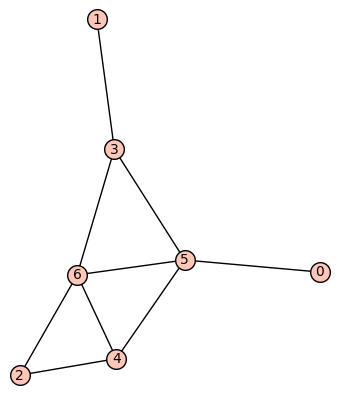

FAIXw
Independent Sets
[[0, 1, 2], [0, 1, 4], [0, 1, 6], [0, 2, 3], [0, 3, 4], [1, 2, 5]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.]
 [ 0.  1. -1. -1.  0.  0.  1.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 1. -1. -1.  1.  1. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


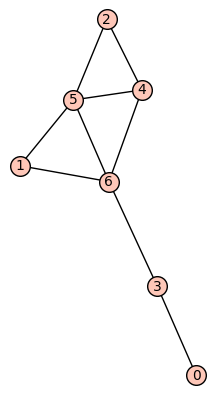

FCHiw
Independent Sets
[[0, 1, 2], [0, 1, 4], [0, 2, 6], [0, 5], [1, 2, 3], [1, 3, 4], [3, 5]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1. -1.  0.  1.  0. -1.]
 [ 0.  0.  1.  0.  0. -1.  1.]
 [ 1. -1. -1. -1.  0.  1.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  0.  0.  1. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


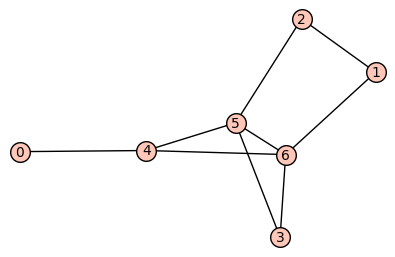

FG_yw
Independent Sets
[[0, 1, 3], [0, 1, 5], [0, 2, 3], [0, 2, 6], [1, 3, 4], [2, 3, 4]]

Matrix A
[[ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.]
 [ 1. -1.  1. -1. -1.  0.  1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


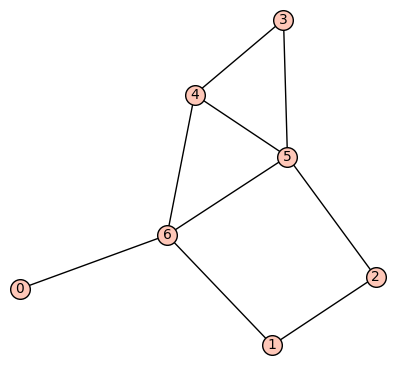

FGC}W
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 1, 5], [0, 2, 3], [0, 2, 4], [2, 3, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 1.  0.  0. -1.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


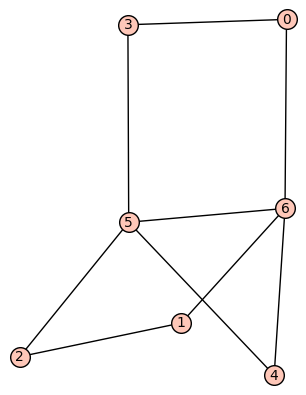

FK?}W
Independent Sets
[[0, 1, 4], [0, 1, 5], [0, 2, 4], [1, 3, 4], [2, 3, 4], [2, 3, 6]]

Matrix A
[[ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  1. -1.  0. -1.  1.  0.]
 [ 1. -1.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


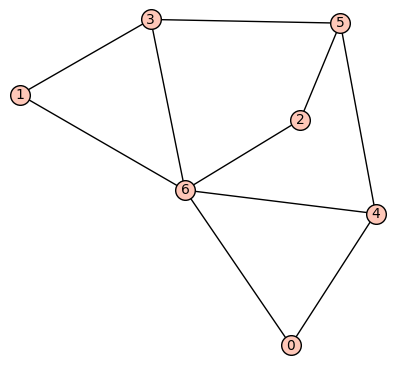

FA_~o
Independent Sets
[[0, 1, 2], [0, 1, 5], [0, 2, 3], [1, 2, 4], [2, 3, 4], [5, 6]]

Matrix A
[[ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 1. -1.  0.  1. -1.  0.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.]
 [ 0.  0.  1.  1.  1. -1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


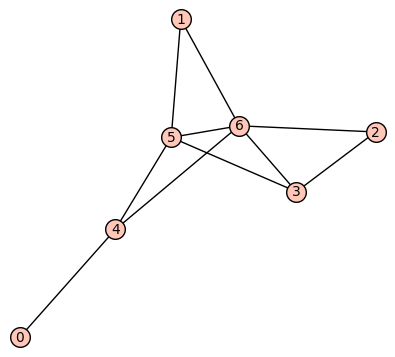

F@`Zw
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 5], [0, 6], [1, 2, 4], [1, 3, 4]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  1. -1.]
 [ 1. -1. -1.  0. -1.  0.  1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


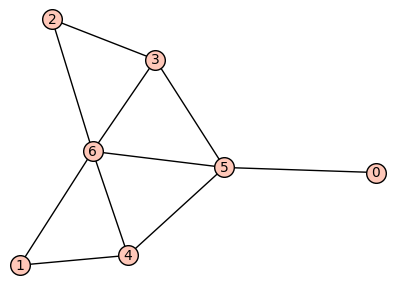

F@QZw
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 4], [0, 3, 4], [0, 6], [1, 2, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0. -1.]
 [ 1. -1. -1.  0.  0. -1.  1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


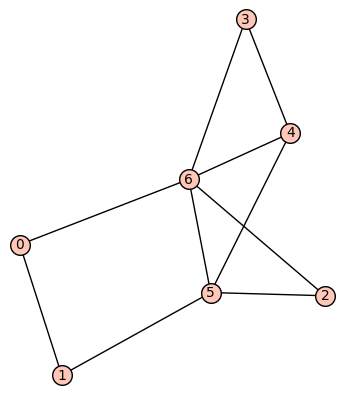

F_Dlw
Independent Sets
[[0, 2, 3], [0, 2, 4], [0, 3, 5], [1, 2, 3], [1, 2, 4], [1, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  1. -1.  0.]
 [ 1. -1. -1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


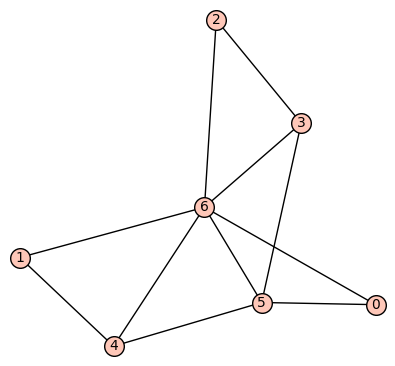

F@Q^w
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 4], [0, 3, 4], [1, 2, 5], [6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1. -1.  1.  1. -1.  0.]
 [ 0.  1.  1.  0.  0.  1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 2.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0]


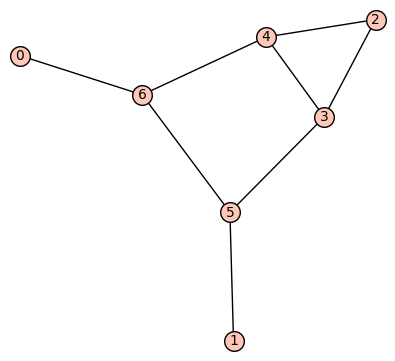

F@LSW
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 2, 5], [0, 4, 5], [1, 2, 6], [1, 3, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1.  0.  1. -1.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 1. -1. -1.  0.  1.  1. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


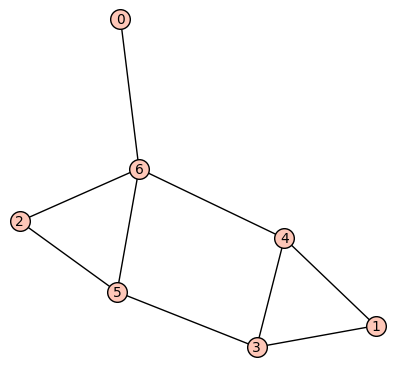

FAStW
Independent Sets
[[0, 1, 2], [0, 1, 5], [0, 2, 3], [0, 2, 4], [0, 4, 5], [1, 6], [3, 6]]

Matrix A
[[ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 1. -1.  0.  0.  1.  1. -1.]
 [ 0.  1.  0. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


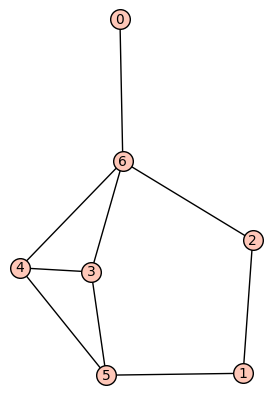

FGD\o
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 2, 3], [0, 2, 4], [0, 2, 5], [1, 6], [5, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1. -1.  1.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]
 [ 1. -1.  1.  0.  0.  1. -1.]
 [ 0.  1.  0.  0.  0. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


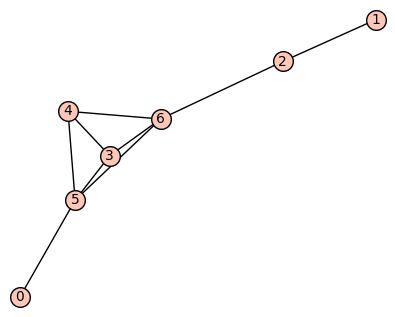

FGEXw
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 1, 6], [0, 2, 3], [0, 2, 4], [1, 5], [2, 5]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.]
 [ 0.  1. -1. -1.  0.  0.  1.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 1. -1.  1.  0.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


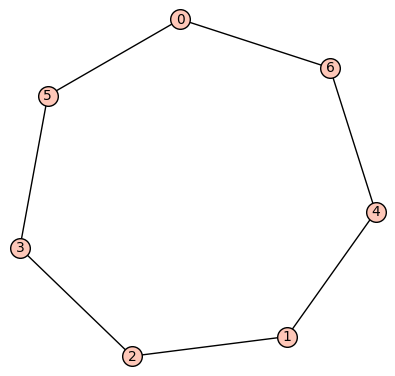

FHQSO
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 3, 4], [1, 3, 6], [1, 5, 6], [2, 4, 5], [2, 5, 6]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  0.  1.  0. -1.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


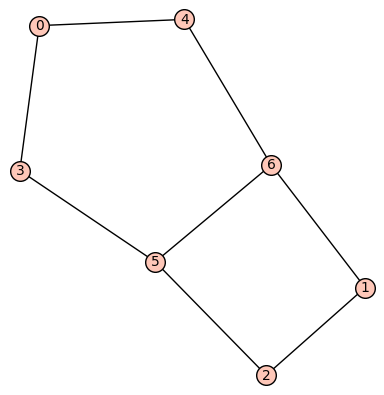

FK_qW
Independent Sets
[[0, 1, 5], [0, 2, 6], [1, 3, 4], [1, 4, 5], [2, 3, 4], [2, 3, 6]]

Matrix A
[[ 0.  1. -1.  0.  0.  1. -1.]
 [ 1. -1.  1. -1. -1.  0.  1.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


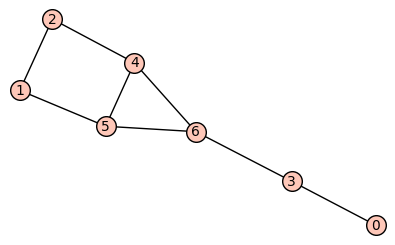

FKHGw
Independent Sets
[[0, 1, 4], [0, 1, 6], [0, 2, 5], [0, 2, 6], [1, 3, 4], [2, 3, 5]]

Matrix A
[[ 0.  0.  0.  0.  1.  0. -1.]
 [ 0.  1. -1.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 1. -1.  1. -1. -1.  0.  1.]
 [ 0.  1. -1.  0.  1. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


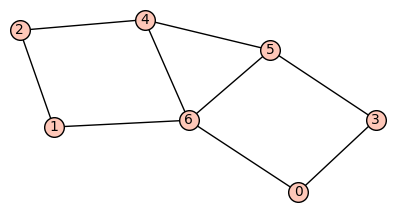

FKG]W
Independent Sets
[[0, 1, 4], [0, 1, 5], [0, 2, 5], [1, 3, 4], [2, 3, 6]]

Matrix A
[[ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 1. -1.  1. -1. -1.  1.  0.]
 [ 0.  1. -1.  0.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


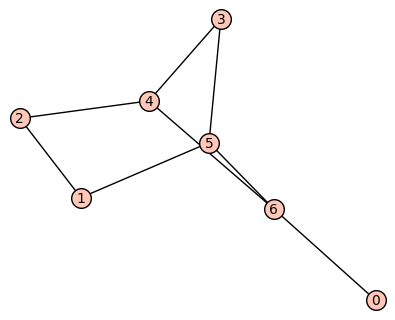

FGLSW
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 2, 3], [0, 2, 5], [0, 4, 5], [1, 3, 6], [2, 3, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1. -1.  1.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 1. -1.  0. -1.  1.  1. -1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


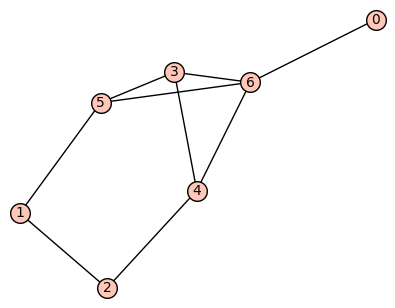

FGLSw
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 2, 3], [0, 2, 5], [0, 4, 5], [1, 6], [2, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1. -1.  1.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 1. -1.  0.  0.  1.  1. -1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


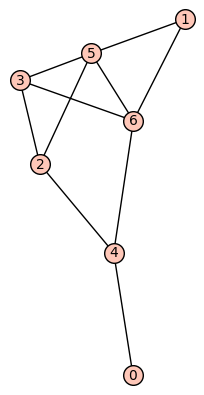

F@hqw
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 6], [0, 5], [1, 3, 4], [4, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1.  0.  0. -1.]
 [ 0.  0.  1.  0.  0. -1.  1.]
 [ 1. -1.  0. -1. -1.  1.  0.]
 [ 0.  1.  0.  1.  0. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


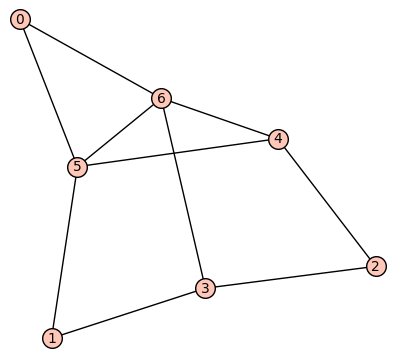

FBJKw
Independent Sets
[[0, 1, 2], [0, 1, 4], [0, 3, 4], [1, 2, 6], [2, 5], [3, 5]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.]
 [ 1. -1. -1.  1.  1.  0. -1.]
 [ 0.  1.  0.  0.  0. -1.  1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


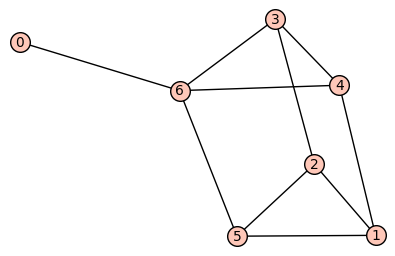

FHTcw
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 3, 5], [0, 4, 5], [1, 6], [2, 6]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  1. -1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 1. -1.  0.  0.  1.  1. -1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


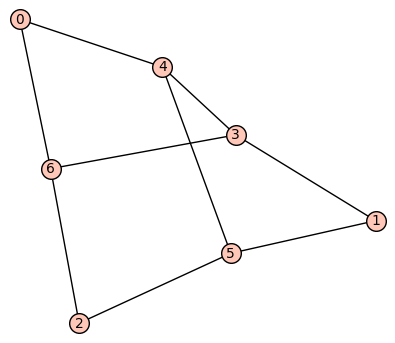

FAdl_
Independent Sets
[[0, 1, 2], [0, 2, 3], [0, 3, 5], [1, 2, 4], [1, 4, 6], [5, 6]]

Matrix A
[[ 0.  1.  0. -1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 1. -1. -1.  1. -1.  1.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.]
 [ 0.  1.  0.  0.  1. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0]


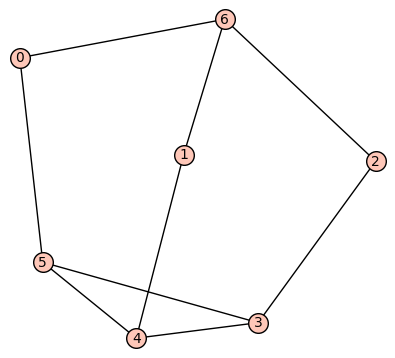

F@U^?
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 4], [1, 2, 5], [3, 6], [4, 6], [5, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 1. -1.  0.  0.  1. -1.  0.]
 [ 0.  1.  1. -1.  0.  1. -1.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


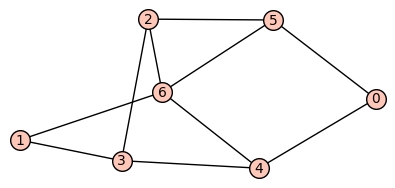

FBebW
Independent Sets
[[0, 1, 2], [0, 3, 6], [1, 2, 4], [1, 4, 5], [3, 5]]

Matrix A
[[ 0.  1.  1. -1.  0.  0. -1.]
 [ 1. -1. -1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  1.  0. -1.  1.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0]


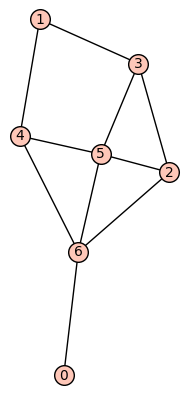

FBO|W
Independent Sets
[[0, 1, 2], [0, 1, 5], [0, 2, 4], [0, 3, 4], [1, 6], [3, 6]]

Matrix A
[[ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  1. -1.  0. -1.  1.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  1.  1.  0. -1.]
 [ 0.  1.  0. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


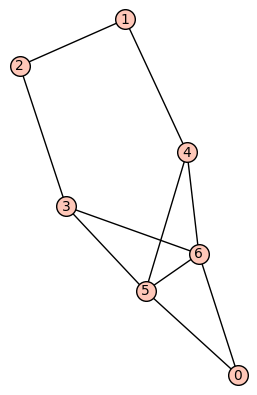

FHQ[w
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 3, 4], [1, 5], [1, 6], [2, 5], [2, 6]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  1.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 0.  1. -1.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


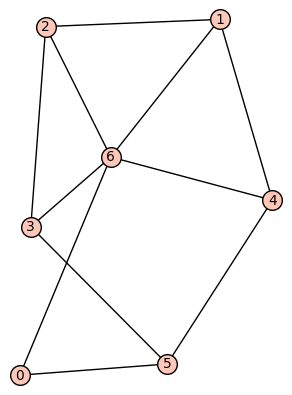

FHQ^o
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 3, 4], [1, 5], [2, 5], [5, 6]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  1.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


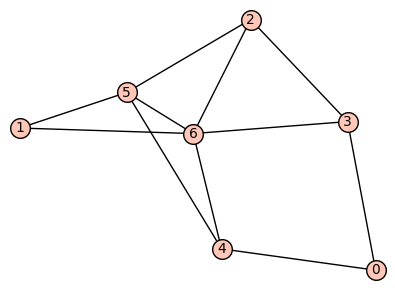

FD`jw
Independent Sets
[[0, 1, 2], [0, 5], [0, 6], [1, 2, 4], [1, 3, 4], [3, 5]]

Matrix A
[[ 0.  1.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 1. -1. -1.  0. -1.  0.  1.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -1.  0.]]

B
[[ 1.]
 [ 0.]
 [-1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


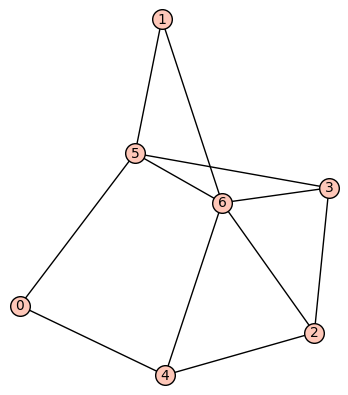

F@jRw
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 6], [1, 3, 4], [2, 5], [4, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0. -1.]
 [ 1. -1.  0. -1. -1.  0.  1.]
 [ 0.  1. -1.  1.  1. -1.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]]

B
[[ 0.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


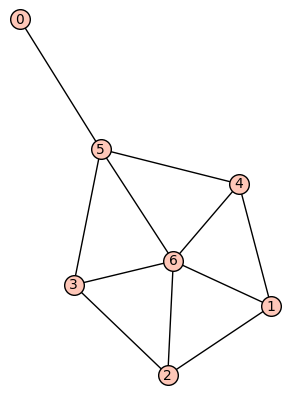

FHQZw
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 3, 4], [0, 6], [1, 5], [2, 5]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0. -1.]
 [ 1. -1.  0.  0.  0. -1.  1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


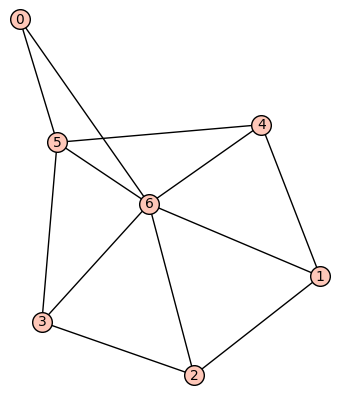

FHQ^w
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 3, 4], [1, 5], [2, 5], [6]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  1.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0]


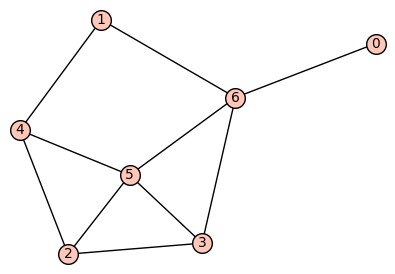

F@W}g
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 1, 5], [0, 3, 4], [2, 6], [4, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1.  0. -1. -1.  1.  0.]
 [ 1.  0. -1.  1.  1.  0. -1.]
 [ 0.  0.  1.  0. -1.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


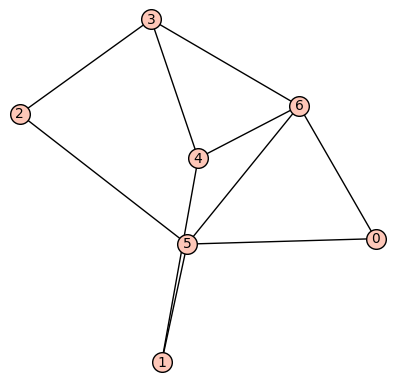

F@Vcw
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 4], [1, 2, 6], [3, 5], [4, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 1. -1.  0.  0.  1.  0. -1.]
 [ 0.  1.  1. -1.  0. -1.  1.]
 [ 0.  0.  0.  1. -1.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


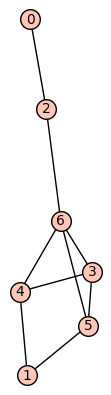

FOTPw
Independent Sets
[[0, 1, 3], [0, 1, 6], [0, 4, 5], [1, 2, 3], [2, 4, 5]]

Matrix A
[[ 0.  0.  0.  1.  0.  0. -1.]
 [ 0.  1.  0.  0. -1. -1.  1.]
 [ 1. -1. -1. -1.  1.  1.  0.]
 [ 0.  1.  0.  1. -1. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


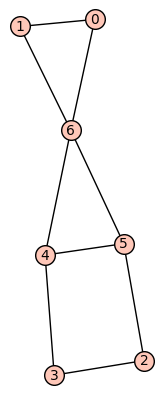

F`CmW
Independent Sets
[[0, 2, 4], [0, 3, 5], [1, 2, 4], [1, 3, 5], [2, 6], [3, 6]]

Matrix A
[[ 0.  0.  1. -1.  1. -1.  0.]
 [ 1. -1. -1.  1. -1.  1.  0.]
 [ 0.  0.  1. -1.  1. -1.  0.]
 [ 0.  1. -1.  1.  0.  1. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


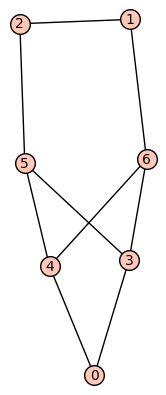

FK_yo
Independent Sets
[[0, 1, 5], [0, 2, 6], [0, 5, 6], [1, 3, 4], [2, 3, 4]]

Matrix A
[[ 0.  1. -1.  0.  0.  1. -1.]
 [ 0.  0.  1.  0.  0. -1.  0.]
 [ 1. -1.  0. -1. -1.  1.  1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


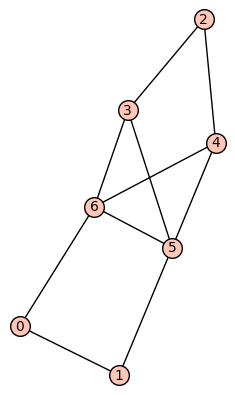

F`H[w
Independent Sets
[[0, 2, 5], [0, 3, 4], [1, 2, 6], [1, 3, 4]]

Matrix A
[[ 0.  0.  1. -1. -1.  1.  0.]
 [ 1. -1. -1.  1.  1.  0. -1.]
 [ 0.  0.  1. -1. -1.  0.  1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


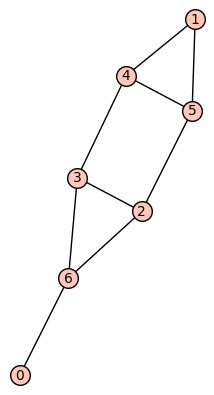

F@Tl_
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 4], [0, 3, 5], [1, 6], [4, 6], [5, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  1. -1.  0.]
 [ 1. -1.  0.  1.  0.  1. -1.]
 [ 0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


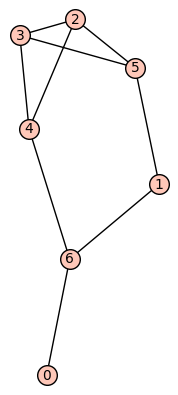

F@LuO
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 4, 5], [2, 6], [3, 6], [5, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 1.  0. -1.  0.  1.  1. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


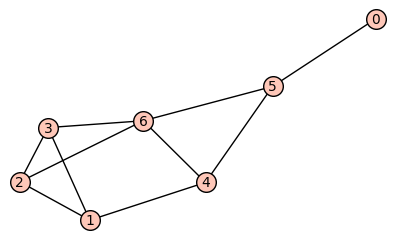

FJQHw
Independent Sets
[[0, 1, 6], [0, 2, 4], [0, 3, 4], [1, 5], [2, 5], [3, 5]]

Matrix A
[[ 0.  1. -1.  0. -1.  0.  1.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  1.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


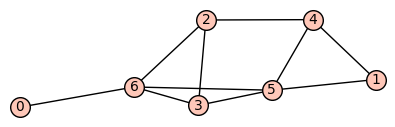

F@X\g
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 5], [0, 3, 4], [1, 6], [4, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1.  0. -1.  0.]
 [ 0.  0.  1. -1. -1.  1.  0.]
 [ 1. -1.  0.  1.  1.  0. -1.]
 [ 0.  1.  0.  0. -1.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


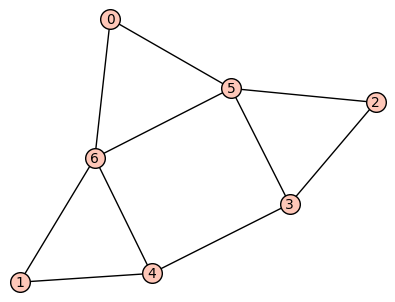

F@UuW
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 2, 4], [1, 5], [2, 6], [3, 6], [4, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1. -1.  1. -1.  0.  0.]
 [ 1. -1.  1.  0.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  1. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1. -1. -1.  1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


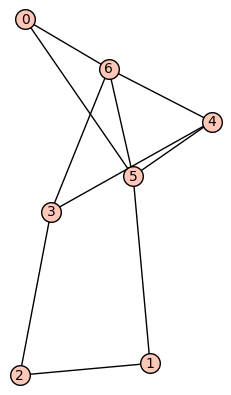

FHFKw
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 2, 4], [1, 6], [2, 5], [2, 6], [3, 5]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 1. -1.  1.  0.  1.  0. -1.]
 [ 0.  1. -1.  0.  0. -1.  1.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 0.  0.  1. -1.  0. -1.  1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


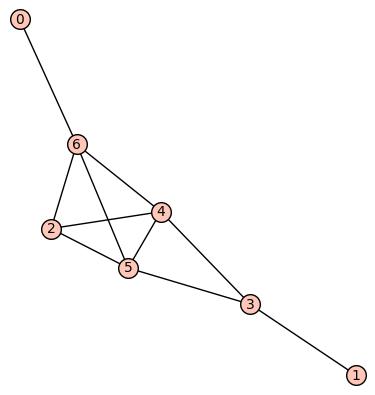

FAK|W
Independent Sets
[[0, 1, 2], [0, 1, 4], [0, 1, 5], [0, 2, 3], [1, 6], [3, 6]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 1. -1.  1.  1.  0.  0. -1.]
 [ 0.  1.  0. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


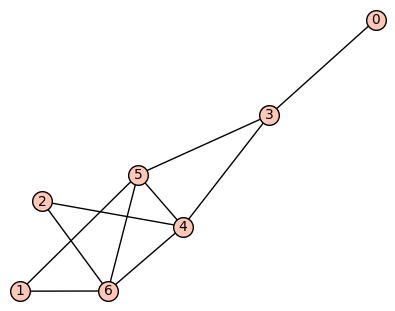

FCLZW
Independent Sets
[[0, 1, 2], [0, 1, 4], [0, 2, 5], [0, 6], [1, 2, 3], [3, 6]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1. -1.  0.  1. -1.  0.]
 [ 0.  0.  1.  0.  0.  1. -1.]
 [ 1. -1. -1. -1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


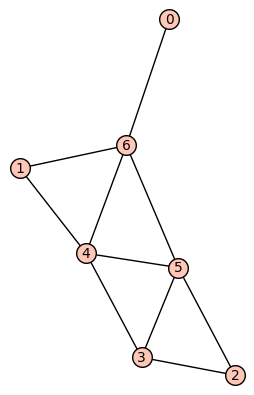

F@S}W
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 1, 5], [0, 2, 4], [2, 6], [3, 6]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1.  0. -1.  1.  0.]
 [ 1.  0.  0.  0.  1.  0. -1.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


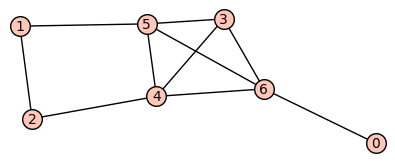

FGL[w
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 2, 3], [0, 2, 5], [1, 6], [2, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1. -1.  1.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 1. -1.  1.  0.  0.  1. -1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


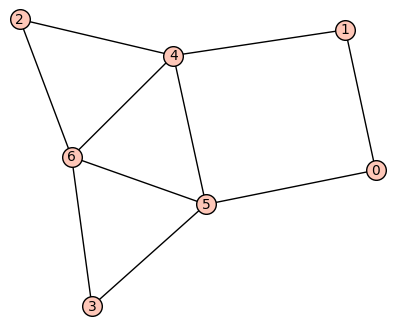

F_YXw
Independent Sets
[[0, 2, 3], [0, 3, 4], [0, 6], [1, 2, 3], [1, 2, 5], [1, 6]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  1.  1.  0. -1.]
 [ 1. -1. -1. -1.  0.  0.  1.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  1.  0.  0.  1. -1.]]

B
[[ 0.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


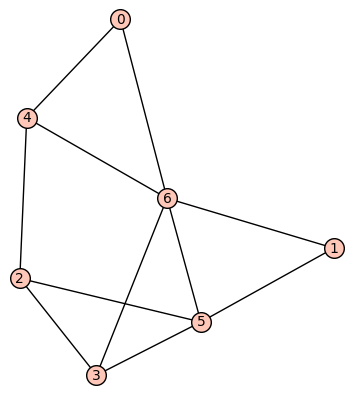

F@huw
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 5], [1, 3, 4], [2, 6], [4, 5]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1.  0.  1.  0. -1.  0.]
 [ 1. -1.  0. -1. -1.  1.  0.]
 [ 0.  1. -1.  1.  1.  0. -1.]
 [ 0.  0.  1.  0. -1. -1.  1.]]

B
[[ 0.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


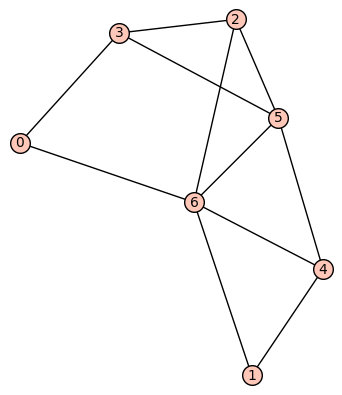

FDO~W
Independent Sets
[[0, 1, 2], [0, 1, 5], [0, 2, 4], [1, 3], [3, 4], [3, 6]]

Matrix A
[[ 0.  0.  1.  0.  0. -1.  0.]
 [ 0.  1. -1.  0. -1.  1.  0.]
 [ 1. -1.  1. -1.  1.  0.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0]


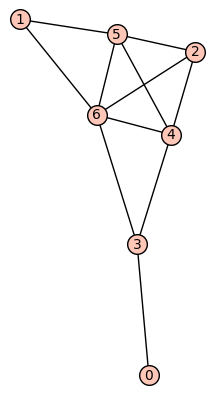

FCLjw
Independent Sets
[[0, 1, 2], [0, 1, 4], [0, 5], [0, 6], [1, 2, 3], [3, 5]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 1. -1. -1. -1.  0.  0.  1.]
 [ 0.  1.  1.  0.  0. -1.  0.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [-1.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


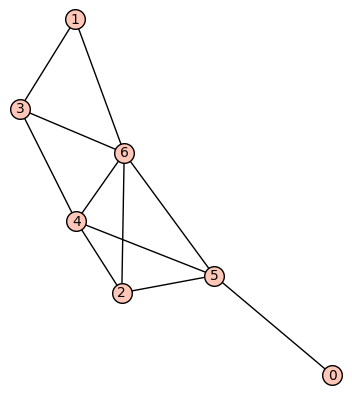

FAMjw
Independent Sets
[[0, 1, 2], [0, 1, 4], [0, 2, 3], [0, 6], [1, 5], [3, 5]]

Matrix A
[[ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1. -1. -1.  1.  0.  0.]
 [ 0.  0.  1.  1.  0.  0. -1.]
 [ 1. -1.  0.  0.  0. -1.  1.]
 [ 0.  1.  0. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


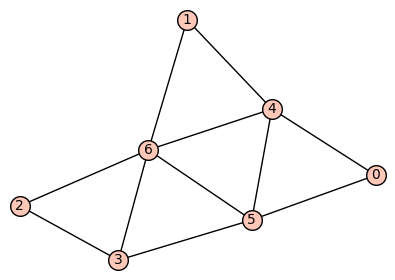

F@qZw
Independent Sets
[[0, 1, 2], [0, 1, 3], [0, 6], [1, 2, 5], [2, 4], [3, 4]]

Matrix A
[[ 0.  0.  1. -1.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0. -1.]
 [ 1. -1. -1.  0.  0. -1.  1.]
 [ 0.  1.  0.  0. -1.  1.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0]


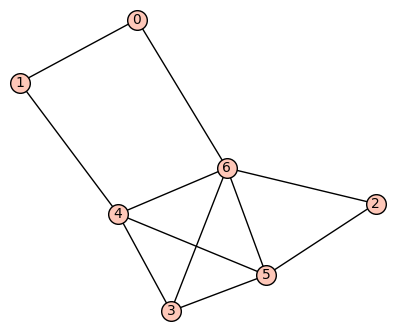

F_S|w
Independent Sets
[[0, 2, 3], [0, 2, 4], [0, 5], [1, 2, 3], [1, 5], [1, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1. -1.  0.]
 [ 1. -1. -1. -1.  0.  1.  0.]
 [ 0.  0.  1.  1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]]

B
[[ 0.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


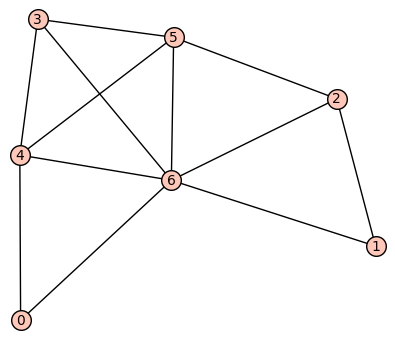

FGc~w
Independent Sets
[[0, 1, 3], [0, 1, 5], [0, 2, 3], [1, 4], [2, 4], [6]]

Matrix A
[[ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 1. -1.  1.  1. -1.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 4.0]


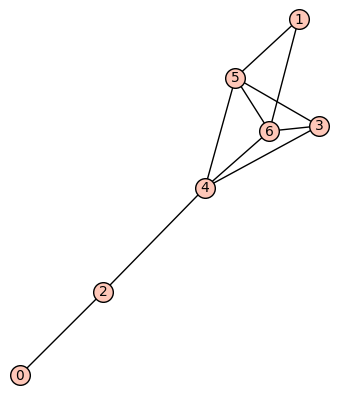

FOLYw
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 5], [0, 6], [1, 2, 3], [2, 5], [2, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 1. -1. -1. -1.  0.  0.  1.]
 [ 0.  1.  0.  1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [-1.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


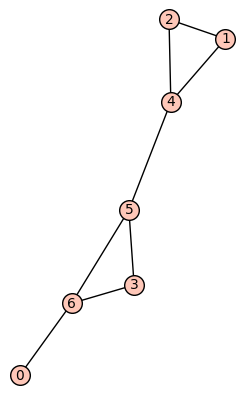

FGW[g
Independent Sets
[[0, 1, 3], [0, 1, 5], [0, 2, 3], [0, 2, 5], [0, 3, 4], [1, 6], [2, 6], [4, 6]]

Matrix A
[[ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  1. -1. -1.  1.  0.]
 [ 1. -1.  0.  1.  1.  0. -1.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


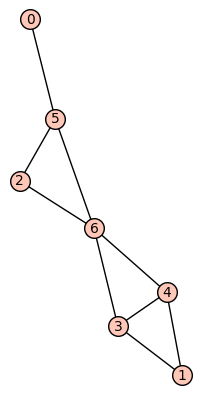

FAU`w
Independent Sets
[[0, 1, 2], [0, 1, 6], [0, 2, 3], [0, 2, 4], [1, 5], [3, 5], [4, 5]]

Matrix A
[[ 0.  0.  1.  0.  0.  0. -1.]
 [ 0.  1. -1. -1.  0.  0.  1.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 1. -1.  1.  0.  1. -1.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


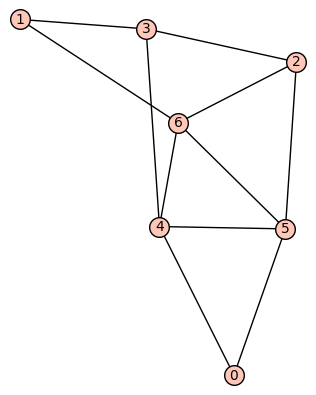

FBejW
Independent Sets
[[0, 1, 2], [0, 3, 6], [1, 2, 4], [1, 5], [3, 5]]

Matrix A
[[ 0.  1.  1. -1.  0.  0. -1.]
 [ 1. -1. -1.  1. -1.  0.  1.]
 [ 0.  0.  1.  0.  1. -1.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]


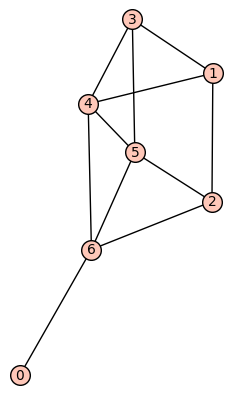

FIS|W
Independent Sets
[[0, 1, 5], [0, 2, 3], [0, 2, 4], [1, 6], [3, 6]]

Matrix A
[[ 0.  1. -1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 1. -1.  1.  0.  1.  0. -1.]
 [ 0.  1.  0. -1.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


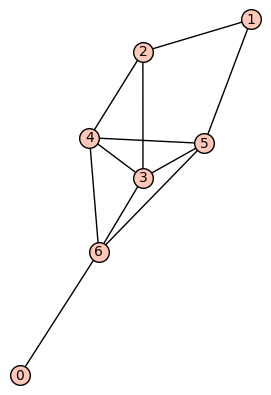

FHL[w
Independent Sets
[[0, 1, 3], [0, 1, 4], [0, 2, 5], [1, 6], [2, 6]]

Matrix A
[[ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1.  0.  1. -1.  0.]
 [ 1. -1.  1.  0.  0.  1. -1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]


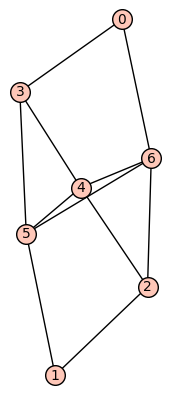

FKL\W
Independent Sets
[[0, 1, 4], [0, 2, 5], [1, 3, 6], [2, 3]]

Matrix A
[[ 0.  1. -1.  0.  1. -1.  0.]
 [ 1. -1.  1. -1.  0.  1. -1.]
 [ 0.  1. -1.  0.  0.  0.  1.]]

B
[[ 0.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0]


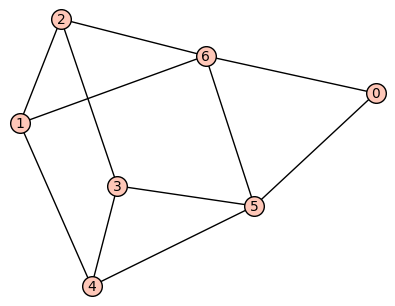

FHU^G
Independent Sets
[[0, 1, 3], [0, 2, 4], [1, 5], [2, 5], [3, 6], [4, 6]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 1. -1.  1.  0.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  1. -1.]
 [ 0.  0.  0.  1. -1.  0.  0.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


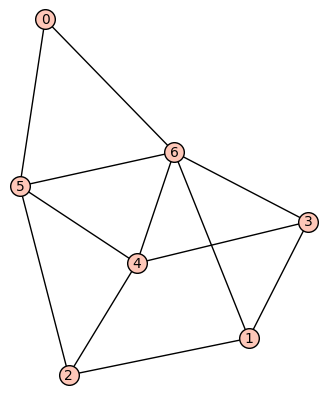

FIMmw
Independent Sets
[[0, 1, 4], [0, 2, 3], [1, 5], [2, 6], [3, 5]]

Matrix A
[[ 0.  1. -1. -1.  1.  0.  0.]
 [ 1. -1.  1.  1.  0. -1.  0.]
 [ 0.  1. -1.  0.  0.  1. -1.]
 [ 0.  0.  1. -1.  0. -1.  1.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


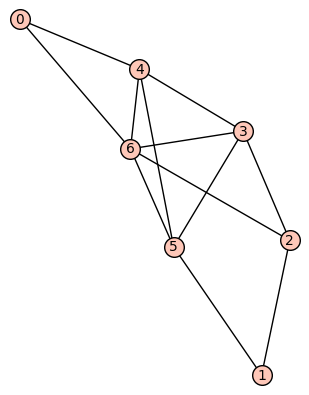

FHd\w
Independent Sets
[[0, 1, 3], [0, 2, 5], [1, 4], [1, 6], [2, 4]]

Matrix A
[[ 0.  1. -1.  1.  0. -1.  0.]
 [ 1. -1.  1.  0. -1.  1.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.]
 [ 0.  1. -1.  0. -1.  0.  1.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0]


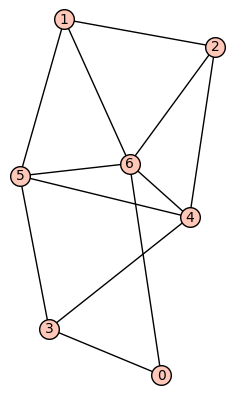

FKL^W
Independent Sets
[[0, 1, 4], [0, 2, 5], [1, 3], [2, 3], [3, 6]]

Matrix A
[[ 0.  1. -1.  0.  1. -1.  0.]
 [ 1. -1.  1. -1.  0.  1.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0]


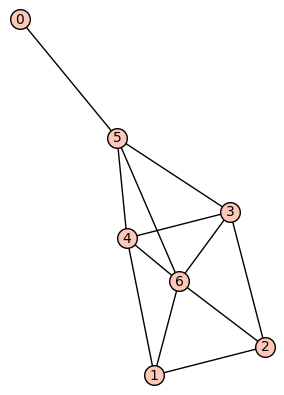

FHUZw
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 6], [1, 5], [2, 5]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1.  0.  1.  0. -1.]
 [ 1. -1.  0.  0.  0. -1.  1.]
 [ 0.  1. -1.  0.  0.  0.  0.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


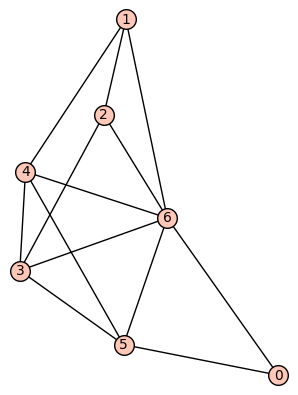

FHU^w
Independent Sets
[[0, 1, 3], [0, 2, 4], [1, 5], [2, 5], [6]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 1. -1.  1.  0.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -1.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 1.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 4.0]


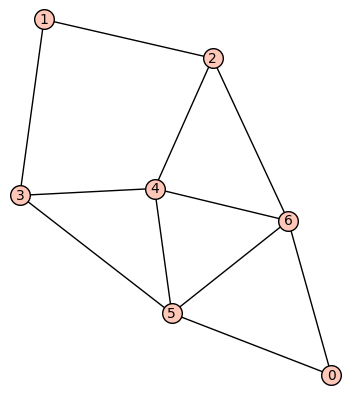

FIM\W
Independent Sets
[[0, 1, 4], [0, 2, 3], [1, 5], [1, 6], [2, 5], [3, 6]]

Matrix A
[[ 0.  1. -1. -1.  1.  0.  0.]
 [ 1. -1.  1.  1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.]
 [ 0.  1. -1.  0.  0. -1.  1.]
 [ 0.  0.  1. -1.  0.  1. -1.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]


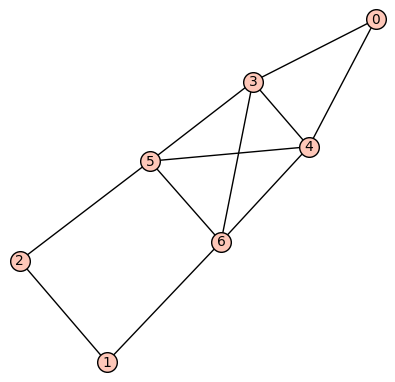

FKcyw
Independent Sets
[[0, 1, 5], [0, 2, 6], [1, 3], [1, 4], [2, 3], [2, 4]]

Matrix A
[[ 0.  1. -1.  0.  0.  1. -1.]
 [ 1. -1.  1. -1.  0.  0.  1.]
 [ 0.  0.  0.  1. -1.  0.  0.]
 [ 0.  1. -1. -1.  1.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.]]

B
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Solution
[2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0]


In [35]:
for index, row in df7.query('levelable == "T" & containsP5').iterrows():
    is_levelable(row['graph6string'], verbose = True)

Many of these seem to have one vertex sticking out (i.e. a vertex with degree 1), but this property doesn't mean it's levelable:

In [41]:
for index, row in df7.query('levelable == "F"').iterrows():
    print row['graph6string'] + " " + str(min(g_read(row['graph6string']).degree()))

F?CNG 1
F??}O 1
F??}o 1
F?@|o 1
F@?]O 1
F@OKg 1
F@AJo 1
F?W\g 1
F?O|_ 1
F@?}O 1
F?`ro 1
FGAZo 1
F?C~O 1
F@C]W 1
F?D~O 1
F?D|o 1
FICcW 1
F@HSW 1
F?_yo 1
F@O^G 1
FGG[w 1
F@Okw 1
FI?\W 1
F@O[w 1
F?StW 1
FGG]w 1
F?MRw 1
F?LVW 1
F?LVw 1
FIAHo 1
F?StG 1
F@G]G 1
FIa@w 2
F?org 1
Fo?yo 2
F?L^? 1
F_LLg 2
F?Uro 1
F?svG 2
FADlW 1
FCDjW 1
Fo?yw 2
F?NPw 1
FEG^W 2
FCDnW 2
F@FJw 1
F?drw 1
F?NVW 2
F@FNw 2
FAEhw 1
F?L^G 1
F?drW 1
F@H}o 1
F?]v_ 2
F?lrg 1
FBEmW 2
F?L|o 1
F?T|o 1
F?v`w 2
F?lvg 2
F?]rw 1
F?]uw 2
F?]vw 2
F@Q?w 1
F@HSO 1
F@O\G 1
F@R@o 1
F@QGw 1
F`?}O 2
FODZo 1
F_K^G 2
FGEZo 1
F@Q}o 2
F@P|o 1
FGSkg 1
FCXPW 1
Fk?gw 2
FGC{o 1
FICkW 1
F?L\_ 1
FGK]G 1
F_StW 2
FGUPw 1
FOLQw 1
FoCiw 2
FAN@w 1
FAYPw 1
F_YPw 2
F@YPw 1
FaG\w 2
FB_mw 2
F@YRw 1
F@YVw 2
F@fbo 2
FHQZo 1
FHQ}o 2
FCX_w 1
FK`_w 2
F?\t_ 1
F@\cg 1
F`KqW 1
FCdj_ 2
FDhaw 2
FBZ@w 1
FDUbW 2
F`IZo 2
FI_xw 1
FaG{w 2
FBZDw 2
FSOzw 2
FI_zw 1
FB`lw 2
F`H\w 2
FI_~w 2
FKcqW 2
FAdtO 2
F`Maw 2
FDdbW 2
F@nBg 2
F`Oxw 1
FoCyw 2
FJQLw 2
F`_zw 2
FDPlw 2
FGdrw 1


#### Graphs on 7 vertices that aren't levelable, don't contain $P(5)$

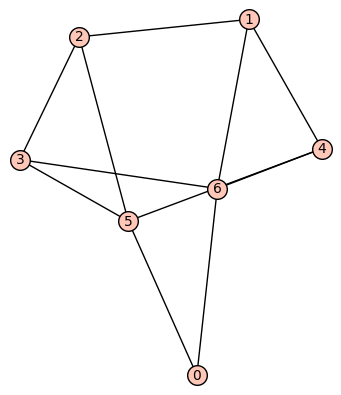

FHQ}o
Independent Sets
[[0, 1, 3], [0, 2, 4], [0, 3, 4], [1, 5], [2, 6], [5, 6]]

Matrix A
[[ 0.  1. -1.  1. -1.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  1.  1. -1.  0.]
 [ 0.  1. -1.  0.  0.  1. -1.]
 [ 0.  0.  1.  0.  0. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

No solution found


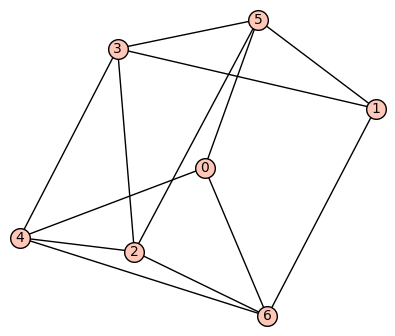

FBnvO
Independent Sets
[[0, 1, 2], [0, 3], [1, 4], [3, 6], [4, 5], [5, 6]]

Matrix A
[[ 0.  1.  1. -1.  0.  0.  0.]
 [ 1. -1.  0.  1. -1.  0.  0.]
 [ 0.  1.  0. -1.  1.  0. -1.]
 [ 0.  0.  0.  1. -1. -1.  1.]
 [ 0.  0.  0.  0.  1.  0. -1.]]

B
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

No solution found


In [36]:
for index,row in df7.query('levelable == "F" & containsP5 == 0').iterrows():
    is_levelable(row['graph6string'], verbose = True)

## Are trees levelable?

In [6]:
treeTable = pd.DataFrame(columns = ["graph6 string", "levelable"])

for i in range(5, 10):
    for t in TreeIterator(i):
        treeTable = treeTable.append({"graph6 string": t.graph6_string(),
                        "levelable": is_levelable(t)}, ignore_index = True)

### What do levelable trees look like?

Dk_


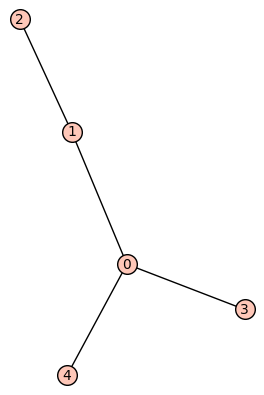

Ds_


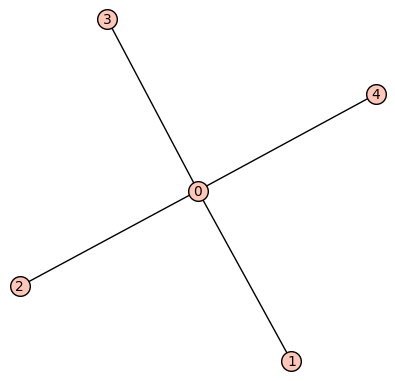

Eia?


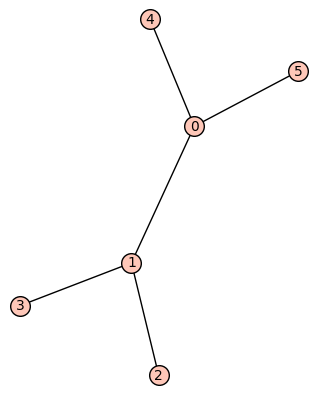

EkE?


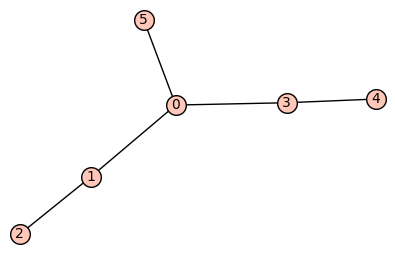

Eka?


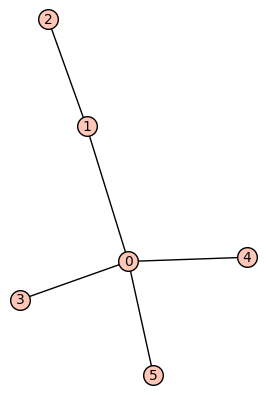

Esa?


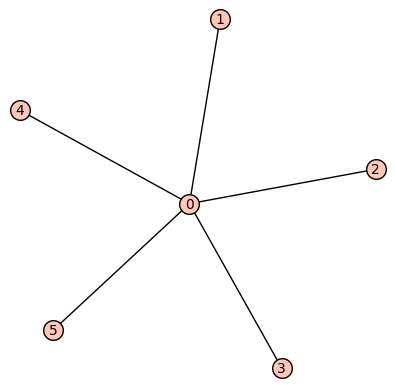

Fi_K?


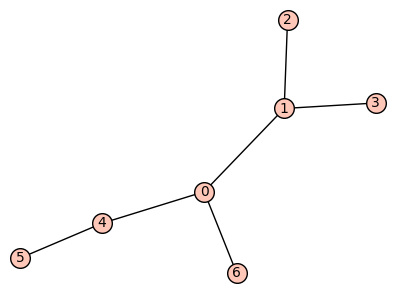

FiaC?


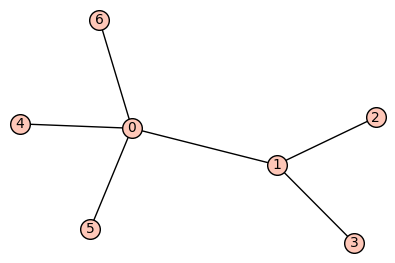

FkEC?


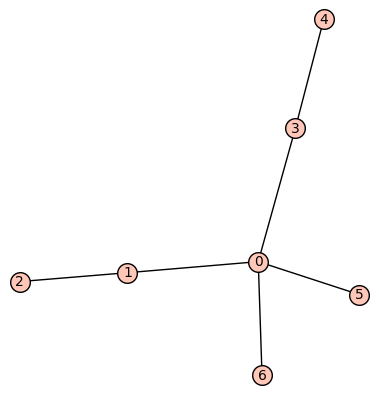

FkaC?


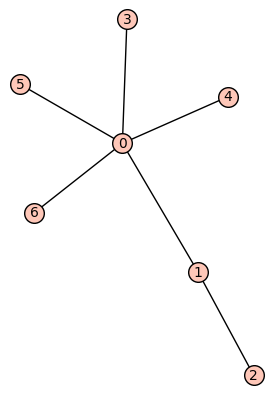

FsaC?


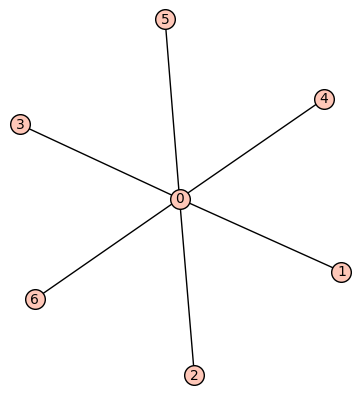

GhQ?K?


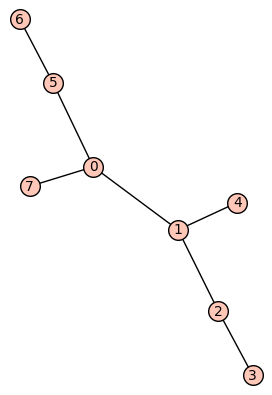

GiQ?K?


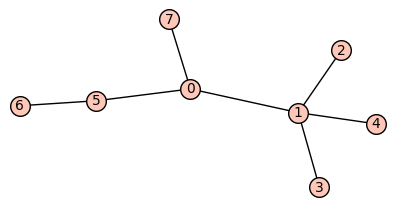

GiQCC?


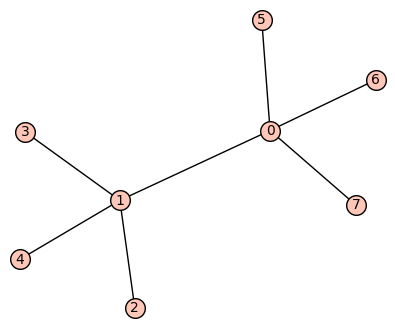

Gi_GS?


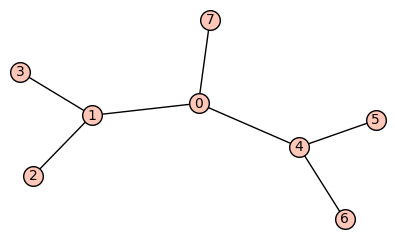

Gi_KC?


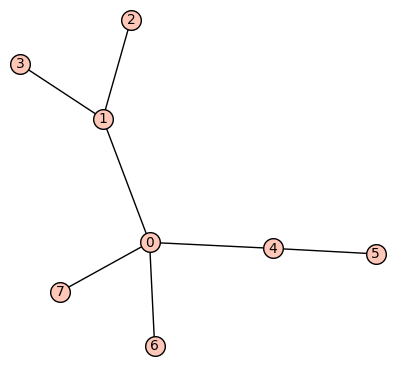

GiaCC?


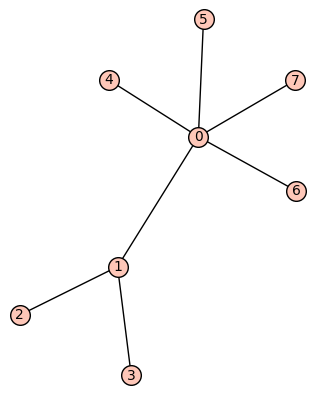

GkE?K?


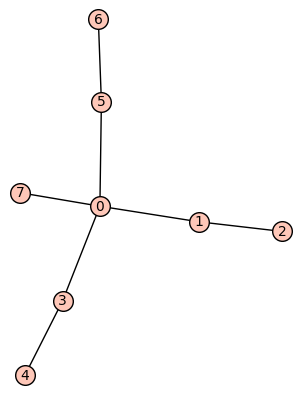

GkECC?


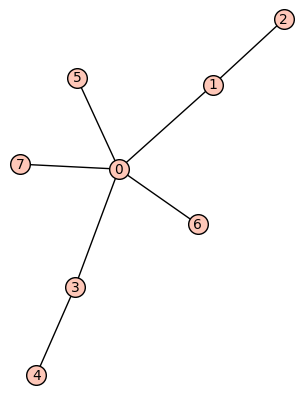

GkaCC?


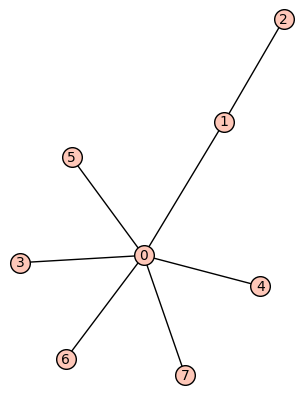

GsaCC?


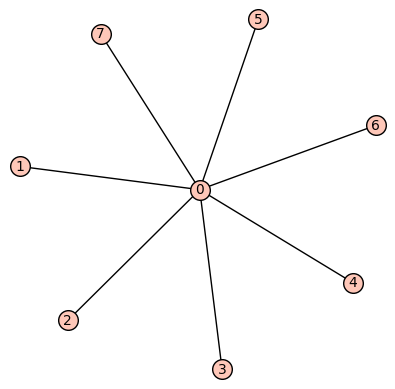

HhQ?GI?


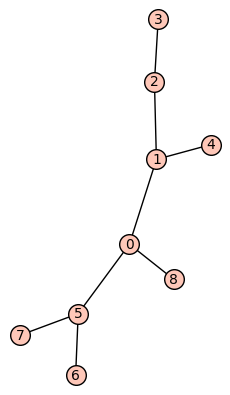

HhQ?KA?


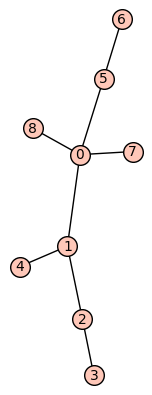

HiPC?E?


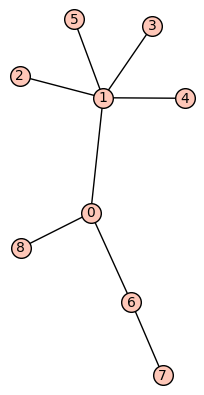

HiQ?GI?


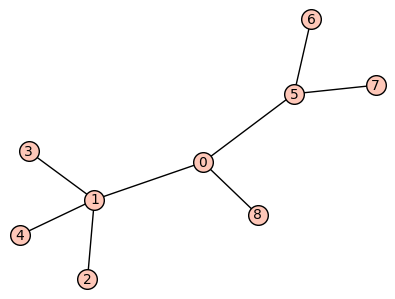

HiQ?KA?


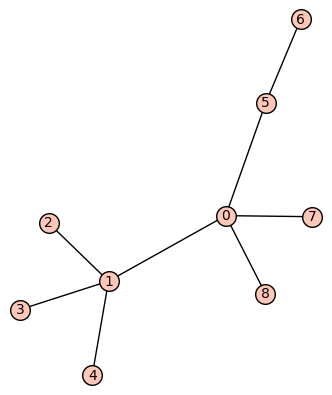

HiQCCA?


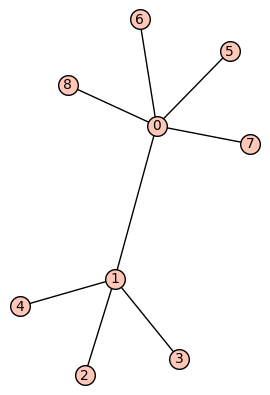

Hi_GSA?


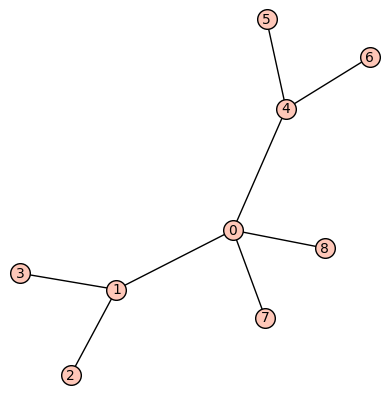

Hi_K?E?


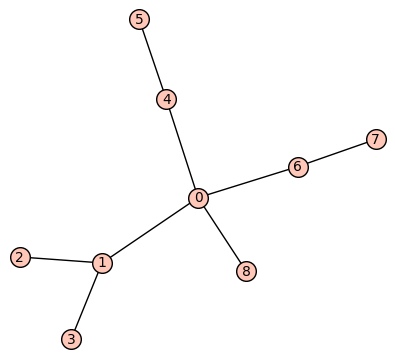

Hi_KCA?


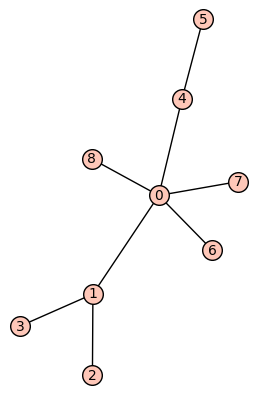

HiaCCA?


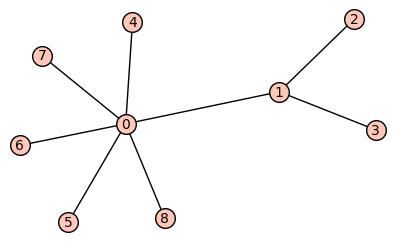

HkE?KA?


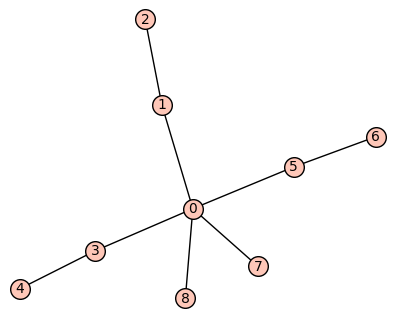

HkECCA?


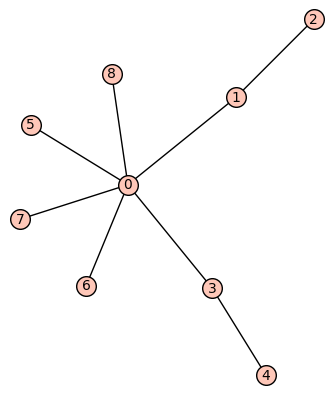

HkaCCA?


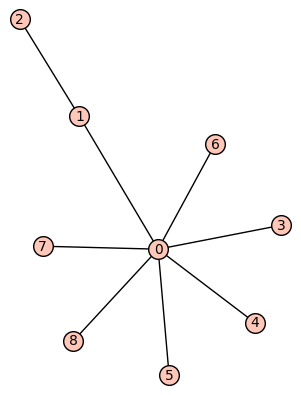

HsaCCA?


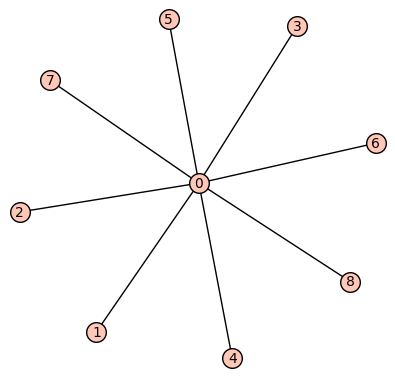

In [7]:
for index, row in treeTable[treeTable.levelable].iterrows():
    print row["graph6 string"]
    g6_show(row["graph6 string"])

### What do non-levelable trees look like?

DkC


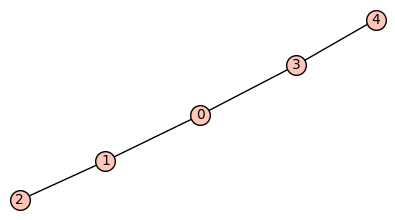

Eh_G


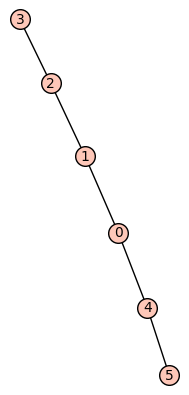

Ei_G


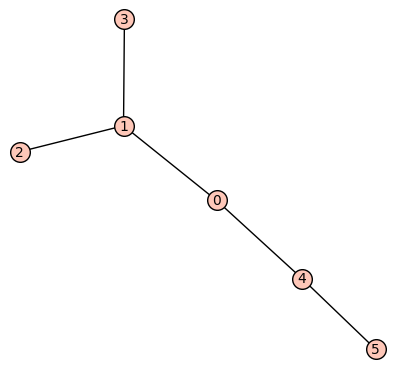

Fh_GG


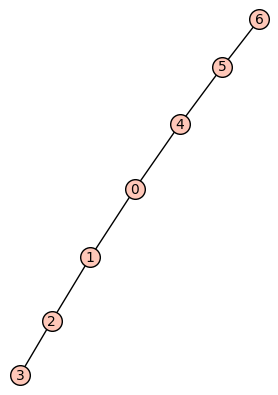

Fh_GO


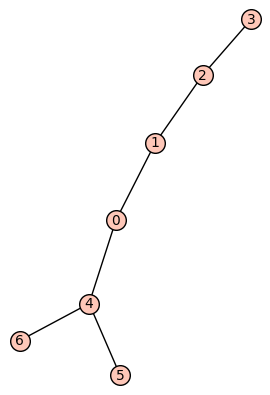

Fh_K?


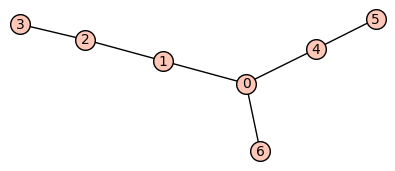

FiQ?G


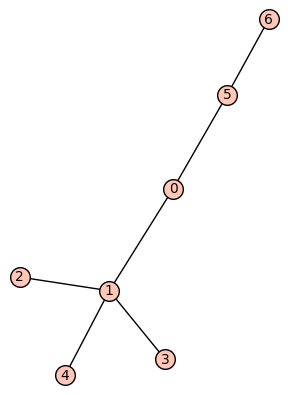

Fi_GO


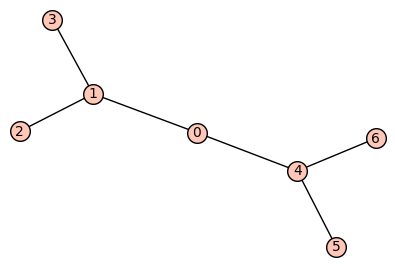

FkE?G


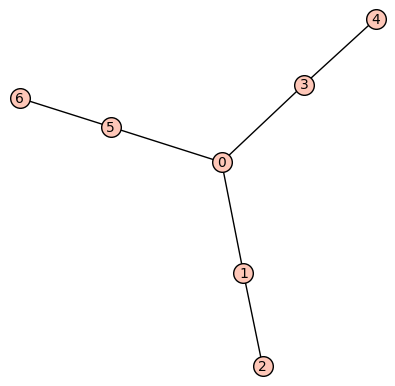

GhE?GC


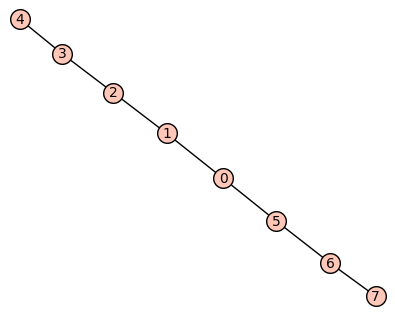

GhI?GC


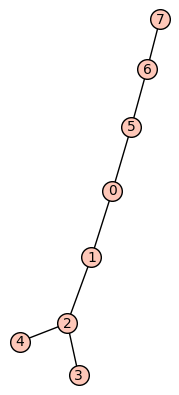

GhI?GG


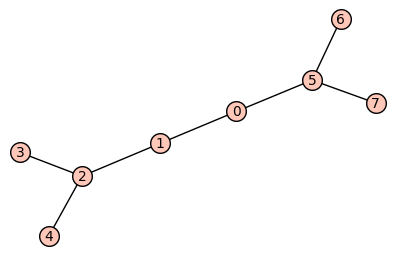

GhQ?GC


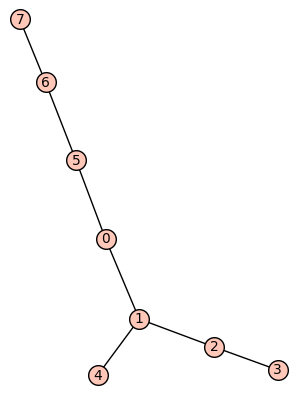

GhQ?GG


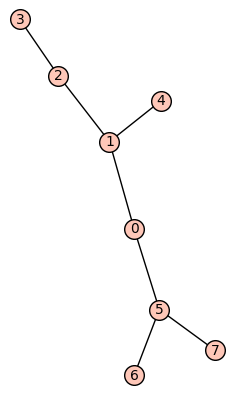

Gh_GK?


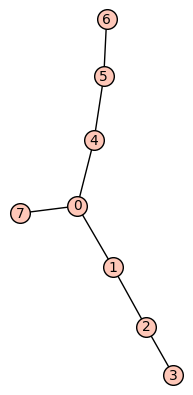

Gh_GOO


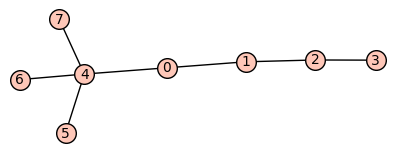

Gh_GS?


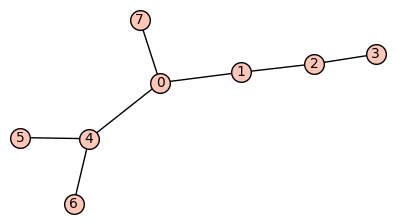

Gh_K?C


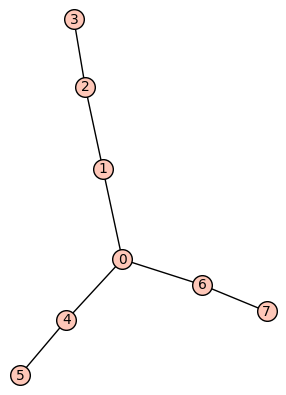

Gh_KC?


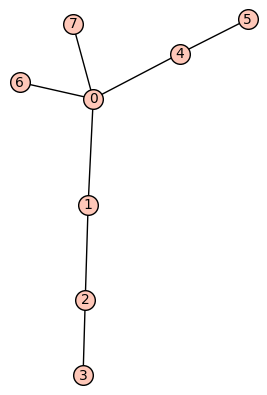

GiPC?C


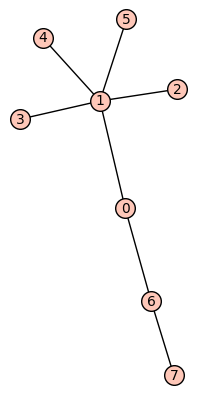

GiQ?GG


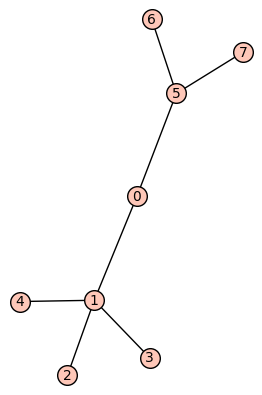

Gi_K?C


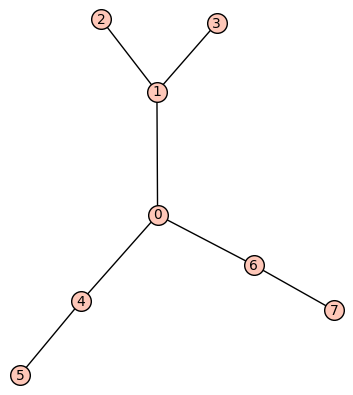

HhE?GC@


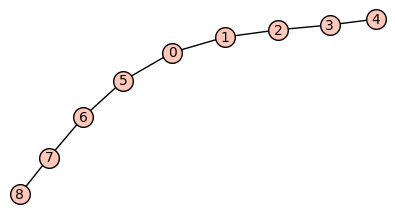

HhE?GCA


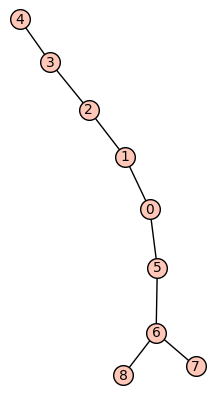

HhE?GCC


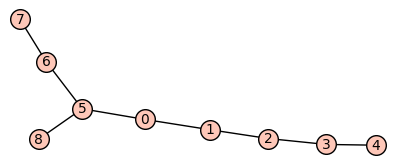

HhE?GE?


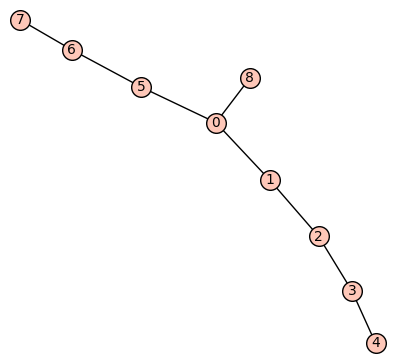

HhGc?C@


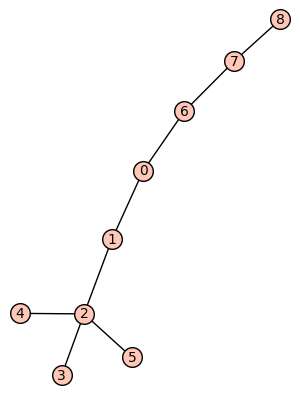

HhHC?C@


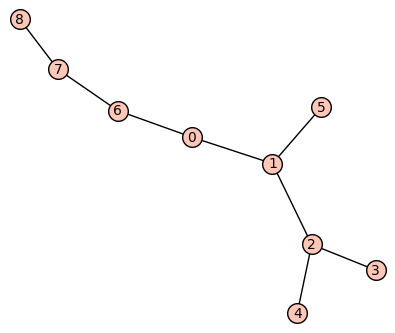

HhI?GCA


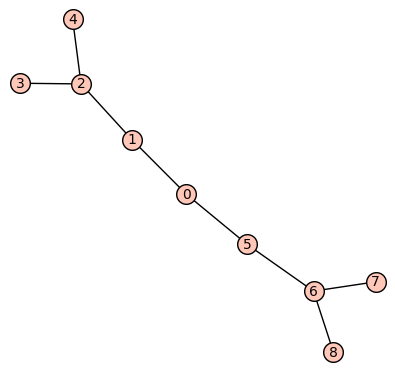

HhI?GCC


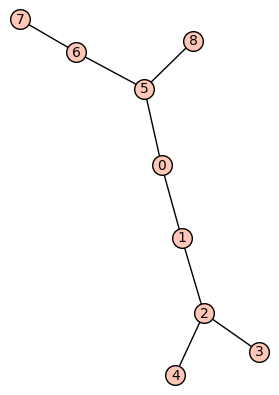

HhI?GE?


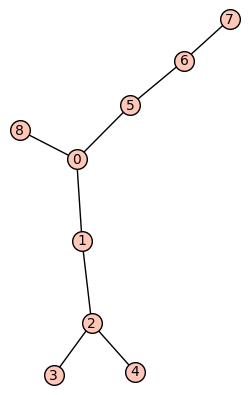

HhI?GGC


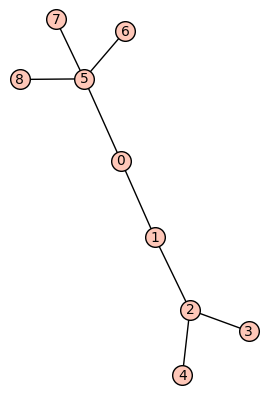

HhI?GI?


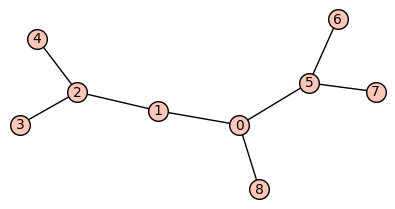

HhI?K?@


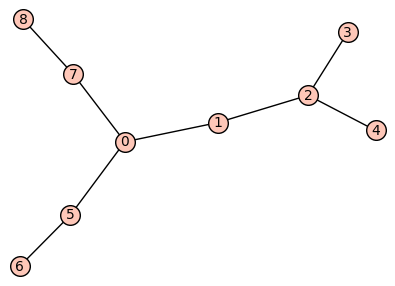

HhI?KA?


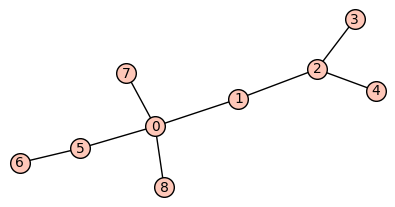

HhOK?C@


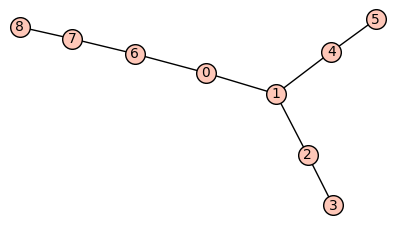

HhPC?C@


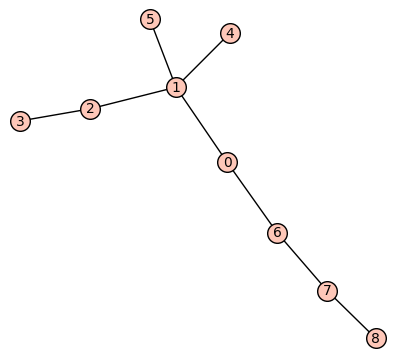

HhQ?GCC


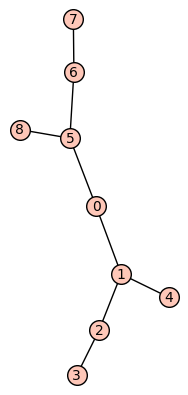

HhQ?GE?


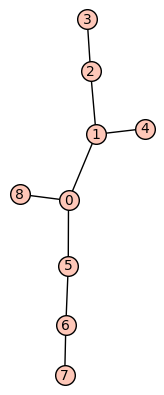

HhQ?GGC


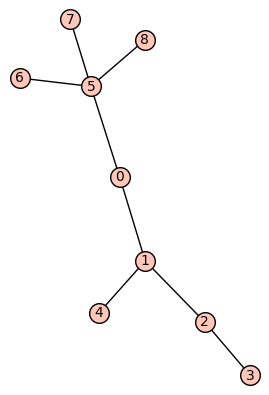

HhQ?K?@


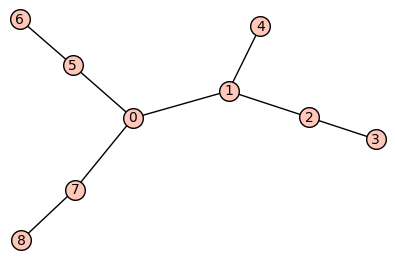

Hh_GK?@


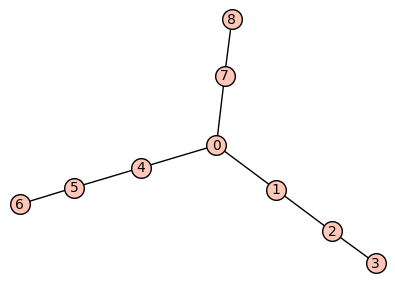

Hh_GKA?


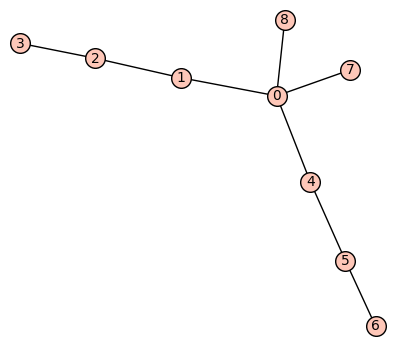

Hh_GOOG


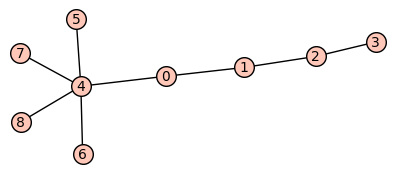

Hh_GOQ?


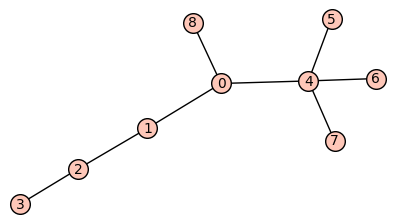

Hh_GS?@


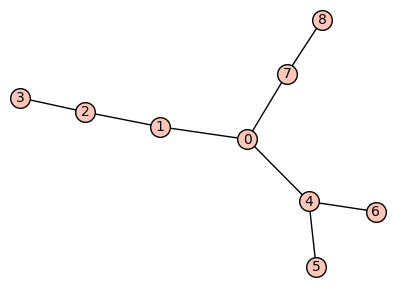

Hh_GSA?


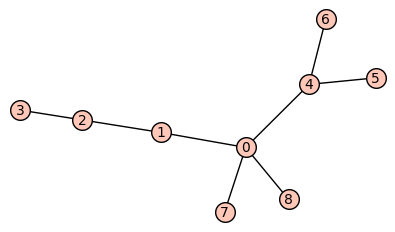

Hh_K?E?


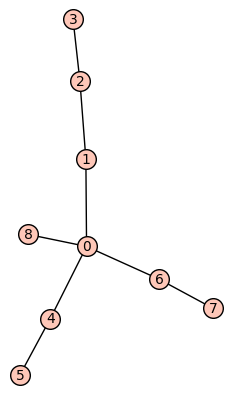

Hh_KCA?


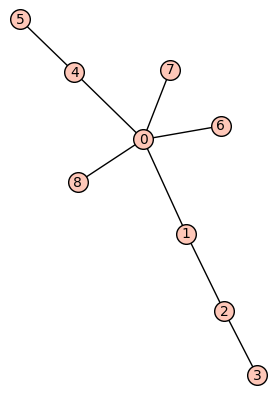

HiPAC?@


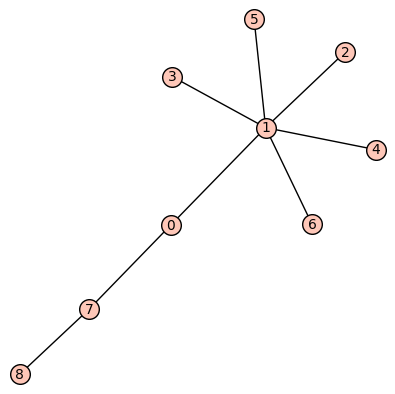

HiPC?CA


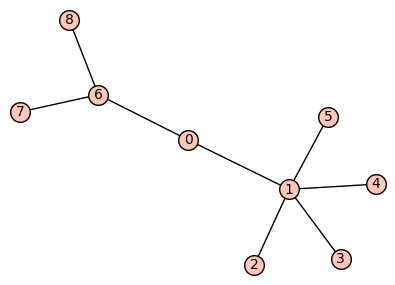

HiQ?GGC


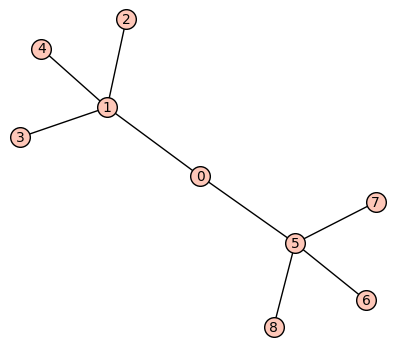

HiQ?K?@


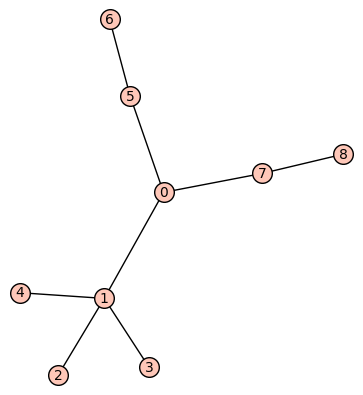

Hi_GS?@


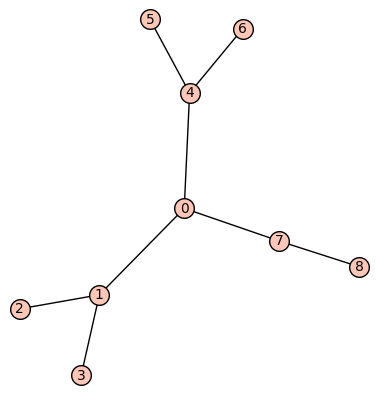

HkE?K?@


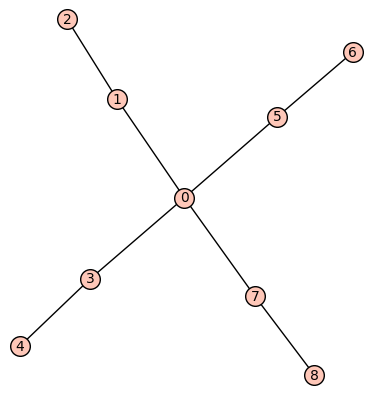

In [8]:
for index, row in treeTable[treeTable.levelable == False].iterrows():
    print row["graph6 string"]
    g6_show(row["graph6 string"])

## Enumerating levelable graphs

In [13]:
# Results over how many vertices?
minVertices = 5
maxVertices = 10

vertices = range(minVertices, maxVertices)

resultsHead = list([["Vertices", "Levelable", "Total graphs"]])
results = list()

for n in vertices:
    # Read the .csv
    df = pd.read_csv("results/results" + str(n) + ".csv")
    
    # Count the number of total graphs in the .csv
    countAll = df.shape[0]
    
    # Count the number of levelable in the .csv
    countLev = df[df.levelable == "T"].shape[0]
    
    results.append([n, countLev, countAll])

print pd.DataFrame(data = np.array(results), columns =resultsHead)

   Vertices  Levelable  Total graphs
0         5         33            34
1         6        140           156
2         7        793          1044
3         8       6962         12346
4         9      98281        274668


In [2]:
i = 5
for l in ["D", "E", "F", "G", "H", "I"]:
    print str(i) + " vertices levelable:" 
    print len(results.query('graph6string.str.contains("^' + l + '") & levelable == "T"'))
    print "of"
    print len(results.query('graph6string.str.contains("^' + l + '")'))
    print
    
    i = i + 1

5 vertices levelable:
20
of
21

6 vertices levelable:
97
of
112

7 vertices levelable:
619
of
853

8 vertices levelable:
6001
of
11117

9 vertices levelable:
90346
of
261080

10 vertices levelable:
1364609
of
11716571



In [3]:
results.tail()


graph6string levelable  \
22604460    Ij]||~~~w         T   
22604461    Ij]||~~~o         T   
22604462    Ij]|~~}~w         T   
22604463    Ij]|~~~~w         T   
22604464    I^~~~~~~w         T   

                                         minimized solution  
22604460  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, ...  
22604461  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...  
22604462  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...  
22604463  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, ...  
22604464  [2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...

## Smallest non-levelable graph
By inspection, there is only one graph on 5 vertices that is not levelable. 

In [3]:
df5 = pd.read_csv("results/results5.csv")

print df5[df5.levelable == "F"]

# Get the index where the False occurs
ind = df5.index[df5.levelable == "F"][0]

# Get the graph6 string of that entry
g6s = df5.loc[ind]["graph6 string"]


   graph6 string levelable minimized solution
19           DQo         F                NaN


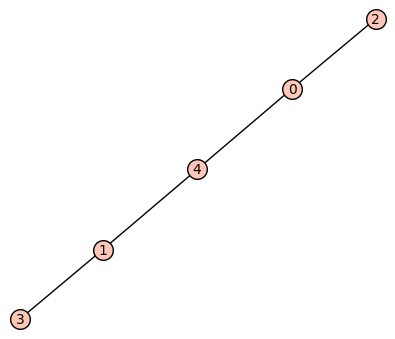

'DQo'

In [5]:
# Load the graph
g = Graph()
from_graph6(g, g6s)

# Show the graph
g.show()
g.graph6_string()

## Are all paths with greater than 4 vertices not levelable?

In [13]:
print ("Is it levelable?")

for n in range(5,21):

    if is_levelable(graphs.PathGraph(n)):
        answer = "Yes"
    else:
        answer = "No"
        
    print "path on " + str(n) + " vertices: " + answer
    

Is it levelable?
path on 5 vertices: No
path on 6 vertices: No
path on 7 vertices: No
path on 8 vertices: No
path on 9 vertices: No
path on 10 vertices: No
path on 11 vertices: No
path on 12 vertices: No
path on 13 vertices: No
path on 14 vertices: No
path on 15 vertices: No
path on 16 vertices: No
path on 17 vertices: No
path on 18 vertices: No
path on 19 vertices: No
path on 20 vertices: No


## Do non-levelable graphs always have a path of length >4  embedded?

### Look at non-levelable graphs

We should expect that these DO have such paths.

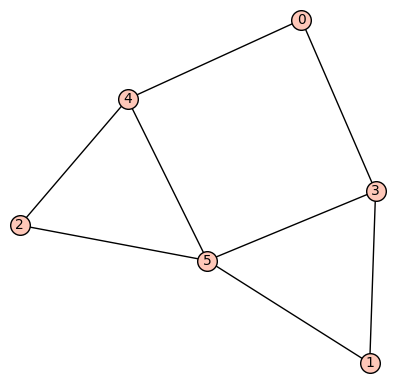

EEhw  6


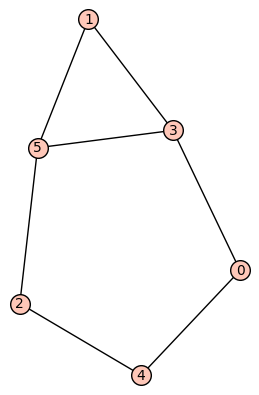

EEho  6


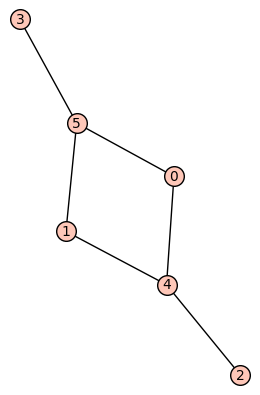

E?zO  5


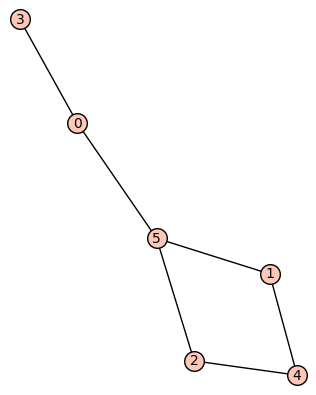

ECZ_  6


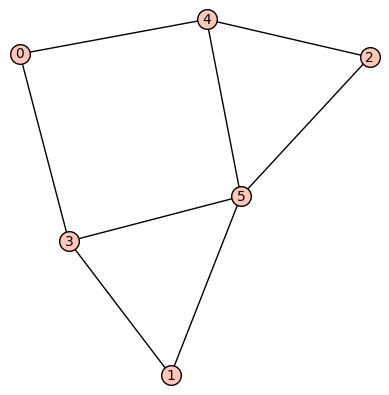

EEhw  6


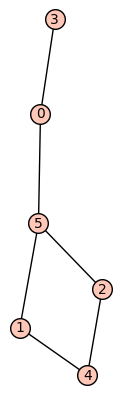

ECZ_  6


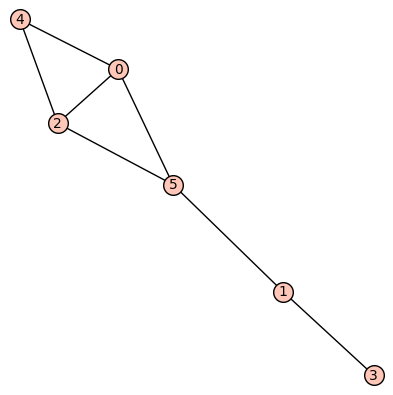

EQj_  6


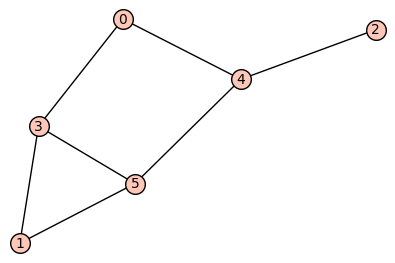

EEhW  6


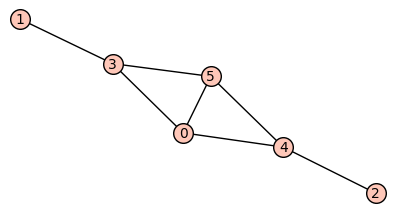

EEiW  6


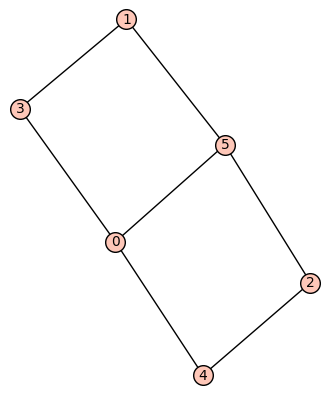

EEj_  6


In [14]:
df = pd.read_csv("results/resultsconnected6.csv")

# Get the index where the False occurs
indF = df.index[df.levelable == "F"]

# Randomly sample some 
ind = np.random.choice(indF, 10)

# Get a list of the graph6 strings that aren't levelable
g6sList = list(df.loc[ind]["graph6 string"])

# Print length of the longest path
for s in g6sList:
    g = Graph()
    from_graph6(g, s)
    g.show()
    
    print s + "  "+ str(g.longest_path().order())

### Look at levelable graphs

We should expect that these do not have such paths.

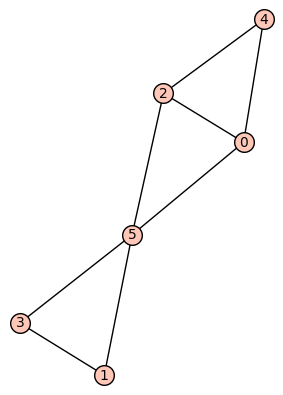

EQjo  6


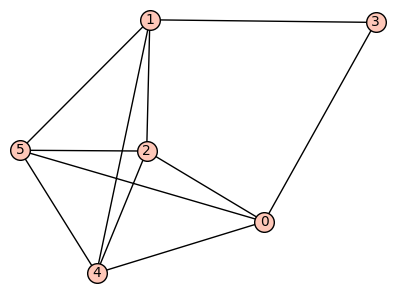

E]zg  6


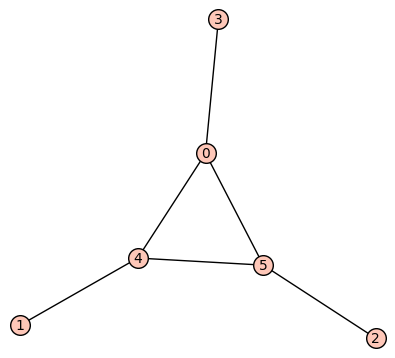

ECqg  5


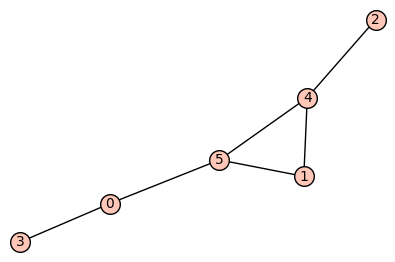

ECZG  6


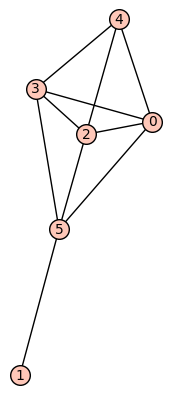

ETno  6


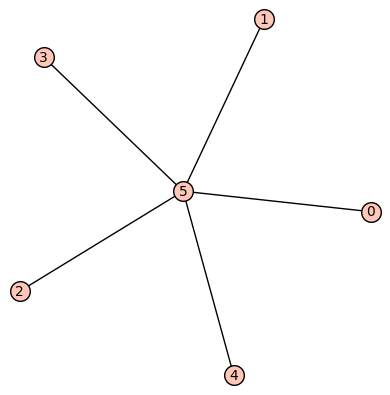

E?Bw  3


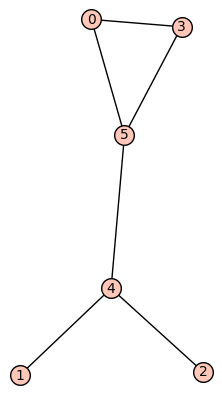

ECYW  5


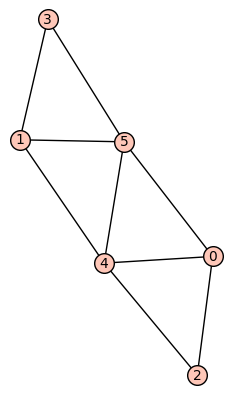

EQzW  6


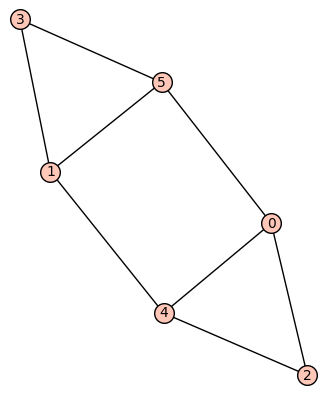

EQzO  6


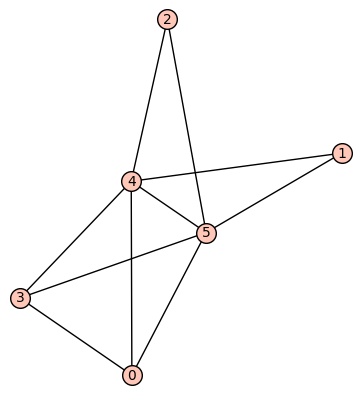

EC~w  6


In [16]:
df = pd.read_csv("results/resultsconnected6.csv")

# Get the index where levelable is true
indT = df.index[df.levelable == "T"]

# Randomly sample some 
ind = np.random.choice(indT, 10)

# Get a list of the graph6 strings that aren't levelable
g6sList = list(df.loc[ind]["graph6 string"])

# Print length of the longest path
for s in g6sList:
    g = Graph()
    from_graph6(g, s)
    g.show()
    
    print s + "  "+ str(g.longest_path().order())

### Look at graphs with only short paths

In [21]:
shortPaths = pd.DataFrame(columns = ["graph6 string", "longest path", "levelable"] )

for g in graphs.nauty_geng(8):
    if g.longest_path().order() < 5:
        shortPaths = shortPaths.append({"graph6 string": g.graph6_string(),
                          "longest path": g.longest_path().order(),
                          "levelable": is_levelable(g)}, 
                         ignore_index = True)

In [107]:
shortPaths

graph6 string longest path levelable
0         G?????            0      True
1         G???C?            2      True
2         G???E?            3      True
3         G???F?            3      True
4         G???F_            3      True
5         G???Fo            3      True
6         G???Fw            3      True
7         G???F{            3      True
8         G??CA?            2      True
9         G??CE?            4      True
10        G??CB?            3      True
11        G??CCC            3      True
12        G??CF?            4      True
13        G??CB_            3      True
14        G??CEC            4      True
15        G??CF_            4      True
16        G??CBo            3      True
17        G??CFC            4      True
18        G??CFo            4      True
19        G??CBw            3      True
20        G??CFc            4      True
21        G??CFw            4      True
22        G??CFs            4      True
23        G??CF{            4      True
24        G??EE?            4      True
25        G??E@_            3      True
26        G??E@o            3      True
27        G??EEC            4      True
28        G??E@c            4      True
29        G??E@w            3      True
..           ...          ...       ...
67        G?`DAG            4      True
68        G?`DAg            4      True
69        G?`@`_            4      True
70        G?`@cO            3      True
71        G?`@`c            4      True
72        G?`CQG            3      True
73        G?`CR_            4      True
74        G?`CRG            4      True
75        G?`CSS            4      True
76        G?`CRg            4      True
77        G?`DQg            4      True
78        G?b@`_            4      True
79        G?b@`c            4      True
80        G?`bCo            4      True
81        G?`crG            4      True
82        G?aJB?            4      True
83        G?aJCW            4      True
84        G?aJBC            4      True
85        G?aJcW            4      True
86        G?r@`_            4      True
87        G?r@`c            4      True
88        G?ouPg            4      True
89        GCOcaO            3      True
90        GCOccc            4      True
91        GCQRCg            4      True
92        GCQQSg            4      True
93        GCQRSg            4      True
94        GCdbCo            4      True
95        GCdbKo            4      True
96        GQhTQg            4      True

[97 rows x 3 columns]

In [23]:
# Are all graphs with short paths levelable?
sum(shortPaths['levelable']) == shortPaths.shape[0]

True

### Conjecture 1 (graphs without long paths are levelable)

Let $G$ be a graph on $n > 5$ vertices. If the longest path in $G$ is less than 5 vertices long, then $\textrm{ind}(G)$ is levelable.

## Regular graphs

It's definitely not true that levelable graphs are necessarily regular. 

As a counterexample, this graph (with graph6 string `G??FF{` is levelable but not regular:

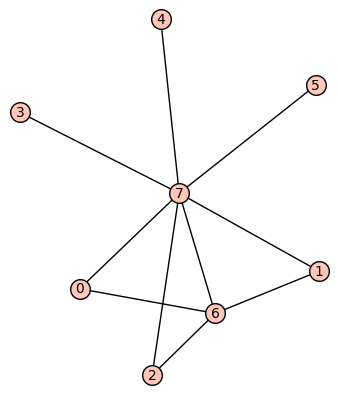

is levelable? True
is regular? False


In [63]:
g = Graph()
from_graph6(g, "G??FF{")

g.show()
print "is levelable? " + str(is_levelable(g))
print "is regular? " + str(g.is_regular())

### Are levelable graphs regular?

In [50]:
df = pd.read_csv("results/resultsconnected7.csv")

isRegular = pd.DataFrame(columns = ["graph6 string", "regular"])

for index, row in df.iterrows():
    g = Graph()
    from_graph6(g, row['graph6 string'])
    
    if g.is_regular():
        isRegular = isRegular.append({"graph6 string": row["graph6 string"], "regular":1}, ignore_index = True)
        
    elif not(g.is_regular()):
        isRegular = isRegular.append({"graph6 string": row["graph6 string"],"regular":0}, ignore_index = True)

In [57]:
df2 = df.merge(isRegular, on = "graph6 string")
df2[df2.regular == 1]

graph6 string levelable                   minimized solution regular
291         FCp`_         T  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]       1
720         FFzvO         T  [2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0]       1
816         FUzro         T  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]       1
852         F~~~w         T  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]       1

## To do:
    check for duplicates in graph6 string 

    question: if diam(G) is small, does that mean levelable?
    
    
To Do: From October 27
* show that it is enough to show for connected compments of a graph
* If it contains a P(5) + another condition is it definitely not levelable? What is this other condition? because it seems like most graphs who 
* Borrow: "Monomial Ideals"
* Grobner bases in Commutative Algebra by Ene and Herzog